### Reading In The Data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib.style as style

In [4]:
import seaborn as sns
# style.use('seaborn-talk') #sets the size of the charts
# style.use('ggplot')

In [5]:
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

In [6]:
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
pd.set_option('max_column', None)
data = pd.read_csv('Week1_challenge_data_source.csv')
df = data
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
# Reading in and printing out description of all columns in the dataset
field_desc = pd.read_excel('Field_Descriptions.xlsx')
count = 0
for i in field_desc['Fields']:
    print(f'{i}: {field_desc.Description[count]}\n')
    count += 1

bearer id: xDr session identifier

Dur. (ms): Total Duration of the xDR (in ms)

Start: Start time of the xDR (first frame timestamp)

Start ms: Milliseconds offset of start time for the xDR (first frame timestamp)

End: End time of the xDR (last frame timestamp)

End ms: Milliseconds offset of end time of the xDR (last frame timestamp)

Dur. (s): Total Duration of the xDR (in s)

IMSI: International Mobile Subscriber Identity

MSISDN/Number: MS International PSTN/ISDN Number of mobile - customer number

IMEI: International Mobile Equipment Identity

Last Location Name: User location call name (2G/3G/4G) at the end of the bearer

Avg RTT DL (ms): Average Round Trip Time measurement Downlink direction (msecond)

Avg RTT UL (ms): Average Round Trip Time measurement Uplink direction (msecond)

Avg Bearer TP DL (kbps): Average Bearer Throughput for Downlink (kbps) - based on BDR duration

Avg Bearer TP UL (kbps): Average Bearer Throughput for uplink (kbps) - based on BDR duration

TCP DL R

In [9]:
# Checking the shape of the dataset
data.shape

(150001, 55)

The dataset has 150001 rows and 55 columns

### Performing Pre-processing

In [10]:
# function to check all columns for percentage missing values
# And return list of columns with 30% or more of values missing
def missing_vals(df):
    count = 0
    drop = []
    for i in df.columns:
        print(f'The column "{i}" has {round(df.isnull().sum()[count]/df[i].shape[0] * 100, 2)}% of values missing.\n')
        if round(df.isnull().sum()[count]/df[i].shape[0] * 100, 2) >= 30:
            drop.append(i)
        count+=1
    return drop

In [11]:
# using the missing vals function and storing the list in a variable
drop = missing_vals(df)

The column "Bearer Id" has 0.66% of values missing.

The column "Start" has 0.0% of values missing.

The column "Start ms" has 0.0% of values missing.

The column "End" has 0.0% of values missing.

The column "End ms" has 0.0% of values missing.

The column "Dur. (ms)" has 0.0% of values missing.

The column "IMSI" has 0.38% of values missing.

The column "MSISDN/Number" has 0.71% of values missing.

The column "IMEI" has 0.38% of values missing.

The column "Last Location Name" has 0.77% of values missing.

The column "Avg RTT DL (ms)" has 18.55% of values missing.

The column "Avg RTT UL (ms)" has 18.54% of values missing.

The column "Avg Bearer TP DL (kbps)" has 0.0% of values missing.

The column "Avg Bearer TP UL (kbps)" has 0.0% of values missing.

The column "TCP DL Retrans. Vol (Bytes)" has 58.76% of values missing.

The column "TCP UL Retrans. Vol (Bytes)" has 64.43% of values missing.

The column "DL TP < 50 Kbps (%)" has 0.5% of values missing.

The column "50 Kbps < DL TP 

In [12]:
# checking columns that will be dropped
drop

['TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B']

In [13]:
# dropping columns with over 30% of data missing and checking shape
df.drop(drop, axis=1, inplace=True)
df.shape

(150001, 45)

In [14]:
# checking head of dataframe
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [16]:
# Function to determine outlier using interquartile range
def outlier_det(df, col):

    return (df.describe()[col][6] - df.describe()[col][4]) * 1.5 + df.describe()[col][6]


# Function to check specified columns for outliers and store row numbers
def outlier_dict(df):

    drop_rows = {}
    for i in df.columns:
        test = outlier_det(df, i)
        count = 0
        lst = []
        print(f'The numer of ouliers in the column {i} is:\n')
        for j in df[i]:
            if j >= test:
                lst.append(count)
                drop_rows[count] = count
                
            else: continue
            count +=1
        print(f'{len(lst)}\n')

    return drop_rows

In [17]:
# creating list of columns to check for outliers
cols = []
cols.extend(list(df.columns[12:14])) 
cols.extend(list(df.columns[27:]))
cols

['Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [18]:
# checking for outliers in selected columns and the number of rows with ouliers
outliers = outlier_dict(df[cols])

The numer of ouliers in the column Avg Bearer TP DL (kbps) is:

13234

The numer of ouliers in the column Avg Bearer TP UL (kbps) is:

21531

The numer of ouliers in the column Nb of sec with Vol DL < 6250B is:

24544

The numer of ouliers in the column Nb of sec with Vol UL < 1250B is:

25154

The numer of ouliers in the column Social Media DL (Bytes) is:

0

The numer of ouliers in the column Social Media UL (Bytes) is:

0

The numer of ouliers in the column Google DL (Bytes) is:

0

The numer of ouliers in the column Google UL (Bytes) is:

0

The numer of ouliers in the column Email DL (Bytes) is:

0

The numer of ouliers in the column Email UL (Bytes) is:

0

The numer of ouliers in the column Youtube DL (Bytes) is:

0

The numer of ouliers in the column Youtube UL (Bytes) is:

0

The numer of ouliers in the column Netflix DL (Bytes) is:

0

The numer of ouliers in the column Netflix UL (Bytes) is:

0

The numer of ouliers in the column Gaming DL (Bytes) is:

0

The numer of oulier

In [19]:
# dropping rows with outliers and checking shape
df.drop(list(outliers.keys()), axis=0, inplace=True)
df.shape

(124847, 45)

In [20]:
# function to forward fill missing column values then backward fill remaining missing values
def ffill_bfill_cols(df, col):
    df[col] = df[col].fillna(method='ffill')
    df[col] = df[col].fillna(method='bfill')


    return df[col]

# function to fill missing values using mode
def mode_fill(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])

    return df[col]

# function to convert column to datetime format
def datetime(df, col):
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
    
    return df[col]

# function to fill missing values based on column types
def fill_cols(df):
    for i in df.columns:
        if df.dtypes[i] == 'float64':
            df[i] = ffill_bfill_cols(df, i)
        elif df.dtypes[i] == 'O':
            df[i] = mode_fill(df, i)
        else: continue
    
    return df

In [21]:
# creating new dataframe with missing values filled
df_pp = fill_cols(df)

In [22]:
# checking to make sure there are no issing values anymore
df_pp.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [23]:
# changing start and end columns to datetime type
for i in ['Start','End']:
    
    df_pp[i] = datetime(df_pp, i)
    
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124847 entries, 25154 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       124847 non-null  float64       
 1   Start                           124847 non-null  datetime64[ns]
 2   Start ms                        124847 non-null  float64       
 3   End                             124847 non-null  datetime64[ns]
 4   End ms                          124847 non-null  float64       
 5   Dur. (ms)                       124847 non-null  float64       
 6   IMSI                            124847 non-null  float64       
 7   MSISDN/Number                   124847 non-null  float64       
 8   IMEI                            124847 non-null  float64       
 9   Last Location Name              124847 non-null  object        
 10  Avg RTT DL (ms)                 124847 non-null  flo

In [24]:
df_pp.reset_index(drop=True, inplace=True)

### Task 1. User Overview Analysis

### Pre-processing for task 1

In [25]:
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

# pd.options.display.float_format = format_float

In [26]:
lst = ['Bearer Id', 'MSISDN/Number', 'Dur. (ms)']
lst2 = []

n_df = pd.DataFrame()

for i in lst:
    n_df[i]= df_pp[i]

for i in df_pp.columns[-16:]:
    lst2.append(re.sub('Bytes', 'MegaBytes', i))

count = -17
for i in lst2:
    n_df[i] = df_pp[df_pp.columns[count]]
    count +=1
    
for i in n_df.columns[3:]:
    n_df[i]= convert_bytes_to_megabytes(n_df, i)

n_df

,Bearer Id,MSISDN/Number,Dur. (ms),Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,7.349883e+18,3.361149e+10,526592.0,0.000415,2.294627,0.019030,6.456091,0.506961,2.513243,0.393681,4.563621,14.169882,17.059017,10.885928,398.294168,6.422467,233.785994,0.186202,32.584151
1,7.349883e+18,3.376260e+10,513490.0,0.000262,0.761984,0.007770,5.759002,3.702192,2.047662,0.480276,2.761297,15.589991,12.044624,15.493345,163.223398,6.214870,335.052892,1.188547,42.676991
2,1.311448e+19,3.365257e+10,523596.0,0.000214,3.144024,0.041564,1.351689,4.018918,0.044235,0.632796,22.993505,6.144069,3.310607,2.003133,263.171478,11.657292,813.933231,2.115386,26.613158
3,7.349883e+18,3.376260e+10,536118.0,0.000352,3.267043,0.034163,3.426480,2.772129,1.739103,0.752120,9.977575,8.673359,23.100171,18.593023,330.470354,15.340630,487.881365,6.392403,52.557827
4,1.311448e+19,3.366169e+10,550527.0,0.000458,0.000795,0.055232,5.391977,2.197776,3.345863,0.074124,15.306858,3.049582,4.361071,21.274681,509.981063,10.223865,382.268762,10.259263,47.134523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124842,7.277826e+18,3.365069e+10,81230.0,0.000229,3.464974,0.052091,9.967603,2.817311,0.057639,0.633237,16.191667,11.763428,17.883703,19.678161,526.609673,9.197207,3.264510,13.487416,57.628851
124843,7.349883e+18,3.366345e+10,97970.0,0.000102,2.344568,0.007613,2.229420,2.185941,1.954414,0.167304,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081
124844,1.311448e+19,3.362189e+10,98249.0,0.000108,1.245845,0.014394,3.850890,2.734579,1.525734,0.532543,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224
124845,1.311448e+19,3.361962e+10,97910.0,0.000082,0.801547,0.021562,4.189773,3.567494,2.228270,0.622644,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096


In [27]:
n_df['Social Total (MegaByte)'] = n_df.iloc[:, 2] + n_df.iloc[:, 3]
n_df['Google Total (MegaByte)'] = n_df.iloc[:, 4] + n_df.iloc[:, 5]
n_df['Email Total (MegaByte)'] = n_df.iloc[:, 6] + n_df.iloc[:, 7]
n_df['Youtube Total (MegaByte)'] = n_df.iloc[:, 8] + n_df.iloc[:, 9]
n_df['Netflix Total (MegaByte)'] = n_df.iloc[:, 10] + n_df.iloc[:, 11]
n_df['Gaming Total (MegaByte)'] = n_df.iloc[:, 12] + n_df.iloc[:, 13]
n_df['Other Total (MegaByte)'] = n_df.iloc[:, 14] + n_df.iloc[:, 15]
n_df['Total Data (MegaByte)'] = n_df.iloc[:, 16] + n_df.iloc[:, 17]
n_df

,Bearer Id,MSISDN/Number,Dur. (ms),Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),Social Total (MegaByte),Google Total (MegaByte),Email Total (MegaByte),Youtube Total (MegaByte),Netflix Total (MegaByte),Gaming Total (MegaByte),Other Total (MegaByte),Total Data (MegaByte)
0,7.349883e+18,3.361149e+10,526592.0,0.000415,2.294627,0.019030,6.456091,0.506961,2.513243,0.393681,4.563621,14.169882,17.059017,10.885928,398.294168,6.422467,233.785994,0.186202,32.584151,526592.000415,2.313657,6.963052,2.906924,18.733503,27.944945,404.716635,233.972196
1,7.349883e+18,3.376260e+10,513490.0,0.000262,0.761984,0.007770,5.759002,3.702192,2.047662,0.480276,2.761297,15.589991,12.044624,15.493345,163.223398,6.214870,335.052892,1.188547,42.676991,513490.000262,0.769754,9.461194,2.527938,18.351288,27.537969,169.438268,336.241439
2,1.311448e+19,3.365257e+10,523596.0,0.000214,3.144024,0.041564,1.351689,4.018918,0.044235,0.632796,22.993505,6.144069,3.310607,2.003133,263.171478,11.657292,813.933231,2.115386,26.613158,523596.000214,3.185588,5.370607,0.677031,29.137574,5.313740,274.828770,816.048617
3,7.349883e+18,3.376260e+10,536118.0,0.000352,3.267043,0.034163,3.426480,2.772129,1.739103,0.752120,9.977575,8.673359,23.100171,18.593023,330.470354,15.340630,487.881365,6.392403,52.557827,536118.000352,3.301206,6.198609,2.491223,18.650934,41.693194,345.810984,494.273768
4,1.311448e+19,3.366169e+10,550527.0,0.000458,0.000795,0.055232,5.391977,2.197776,3.345863,0.074124,15.306858,3.049582,4.361071,21.274681,509.981063,10.223865,382.268762,10.259263,47.134523,550527.000458,0.056027,7.589753,3.419987,18.356440,25.635752,520.204928,392.528025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124842,7.277826e+18,3.365069e+10,81230.0,0.000229,3.464974,0.052091,9.967603,2.817311,0.057639,0.633237,16.191667,11.763428,17.883703,19.678161,526.609673,9.197207,3.264510,13.487416,57.628851,81230.000229,3.517065,12.784914,0.690876,27.955095,37.561864,535.806880,16.751926
124843,7.349883e+18,3.366345e+10,97970.0,0.000102,2.344568,0.007613,2.229420,2.185941,1.954414,0.167304,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081,97970.000102,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145
124844,1.311448e+19,3.362189e+10,98249.0,0.000108,1.245845,0.014394,3.850890,2.734579,1.525734,0.532543,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224,98249.000108,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585
124845,1.311448e+19,3.361962e+10,97910.0,0.000082,0.801547,0.021562,4.189773,3.567494,2.228270,0.622644,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096,97910.000082,0.823109,7.757267,2.850914,17.122508,16.494842,355.066446,816.120043


In [28]:
# final_df = n_df[['Bearer Id', 'MSISDN/Number', 'Dur. (ms)','social total', 'google total', 'email total',\
#                  'youtube total', 'netflix total', 'gaming total', 'other total']]
# final_df.head()

### Sub Task

In [29]:
# checking the values in Handset Type column
df_pp['Handset Type'].value_counts()

Huawei B528S-23A                                           17965
Apple iPhone 6S (A1688)                                     7906
undefined                                                   7889
Apple iPhone 6 (A1586)                                      7115
Apple iPhone 7 (A1778)                                      4827
                                                           ...  
Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5 Wave 4.0        1
Tecno Telecom (H. It1506                                       1
Zyxel Communicat. Lte7460                                      1
Samsung Galaxy Note 3 (Sm-N900X)                               1
Asustek Asus Ze500Kl Zenfone 2 Lazer                           1
Name: Handset Type, Length: 1147, dtype: int64

In [30]:
# dropping all rows with undefined in Handset Type
df_pp.drop(df_pp[df_pp['Handset Type'] == 'undefined'].index, axis=0, inplace = True)

In [31]:
# checking shape of dataframe
df_pp.shape

(116958, 45)

#### Identifying top 10 handsets used by the customers

In [32]:
top_handsets = df_pp.groupby('Handset Type').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)[:10]
top_handsets

,MSISDN/Number
Handset Type,
Huawei B528S-23A,17965
Apple iPhone 6S (A1688),7906
Apple iPhone 6 (A1586),7115
Apple iPhone 7 (A1778),4827
Apple iPhone Se (A1723),4265
Apple iPhone 8 (A1905),4079
Apple iPhone Xr (A2105),3978
Samsung Galaxy S8 (Sm-G950F),3973
Samsung Galaxy J5 (Sm-J530),3418


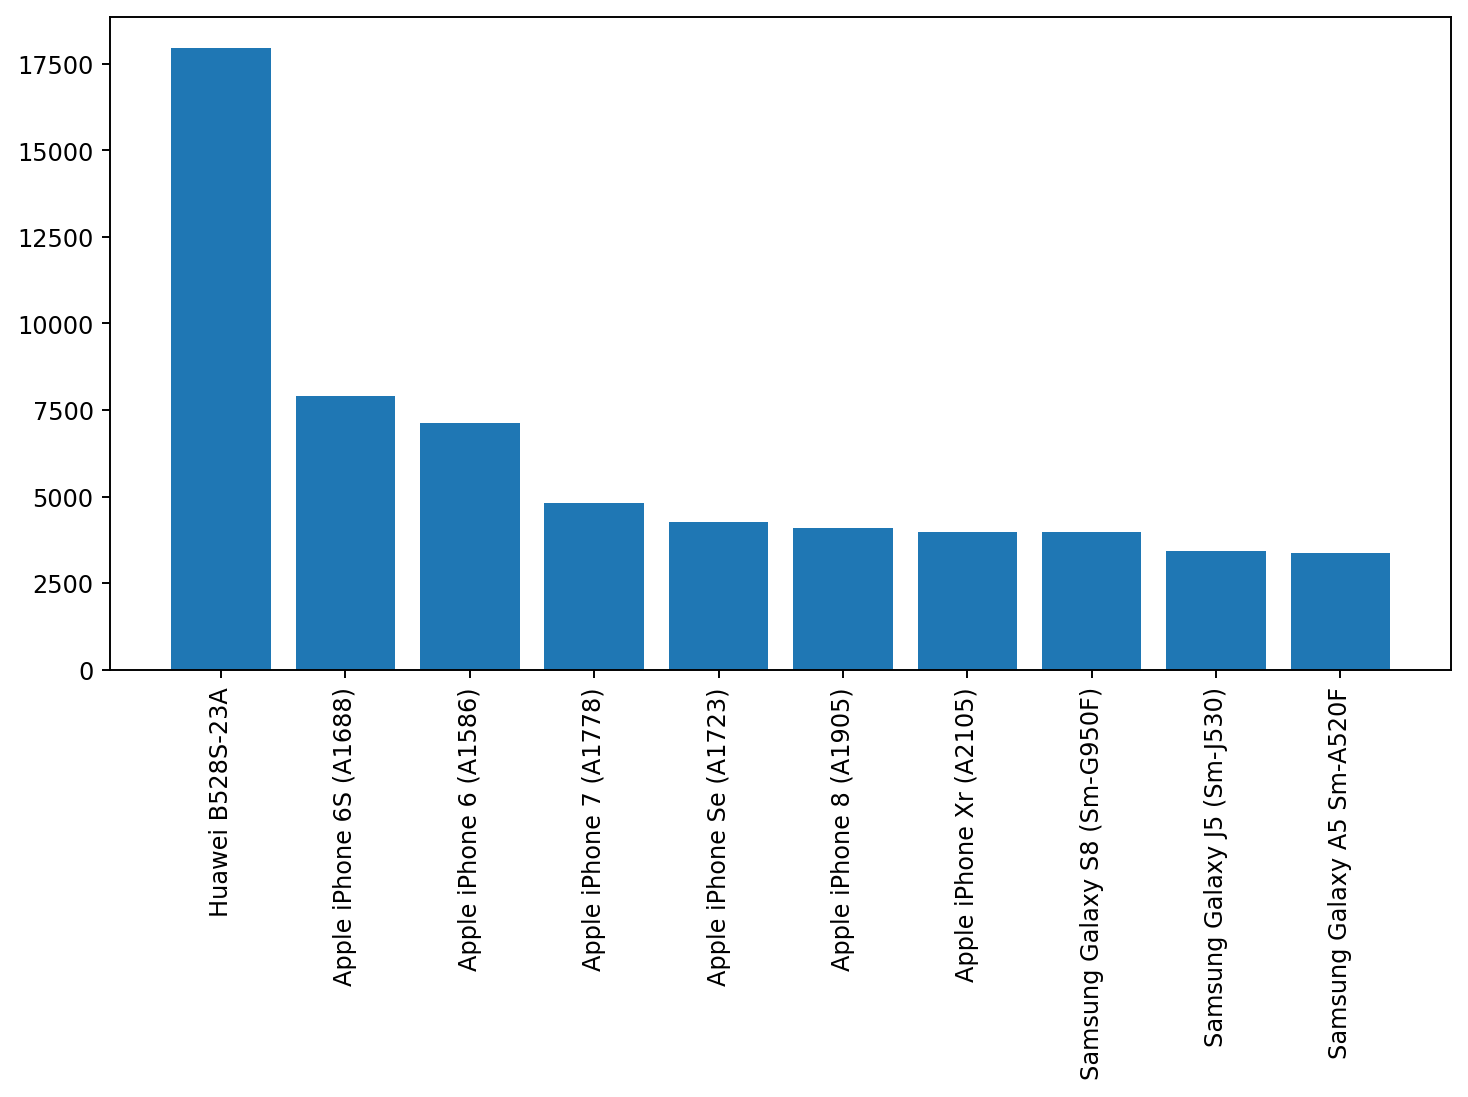

In [33]:
# Plot of top 10 handsets
plt.figure(figsize = (10,5), dpi = 173)

plt.bar(top_handsets.index, top_handsets['MSISDN/Number'])

plt.xticks(rotation=90)

plt.show()

#### Identifying The Top 3 Handset Manufacturer

In [34]:
# checking top 3 handset manufacturers
top_manufacturers = df_pp.groupby('Handset Manufacturer').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)[:3]
top_manufacturers

,MSISDN/Number
Handset Manufacturer,
Apple,48435
Samsung,35266
Huawei,29802


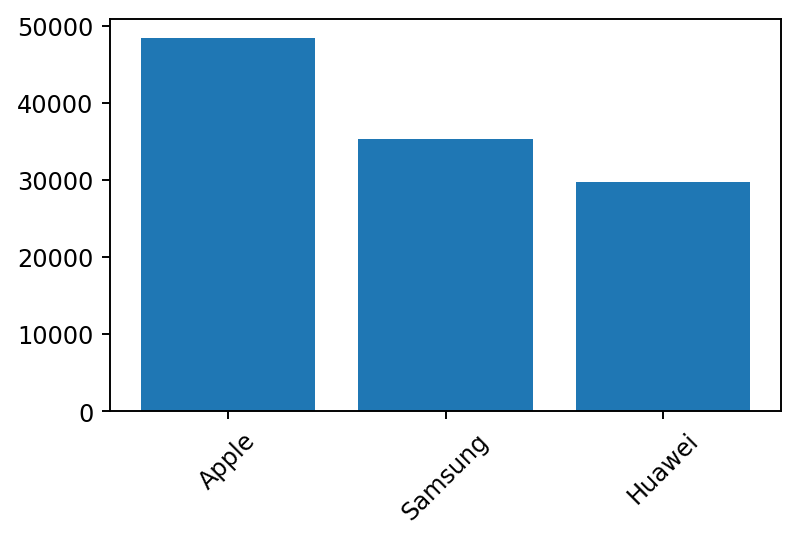

In [35]:
# Plot of top 3 handset manufacturers
plt.figure(figsize = (5,3), dpi = 173)

plt.bar(top_manufacturers.index, top_manufacturers['MSISDN/Number'])

plt.xticks(rotation=45)

plt.show()

#### identifing the top 5 handsets per top 3 handset manufacturer

In [36]:
# top3 = df_pp.loc[(df_pp['Handset Manufacturer'] == 'Apple') | df['Handset Manufacturer'] == 'Samsung' | df['Handset Manufacturer'] == 'Huawei']
top3 = df_pp.loc[df['Handset Manufacturer'].str.contains('Apple|Samsung|Huawei', flags=re.I, regex=True)]
top3 = top3[['Handset Type', 'Handset Manufacturer']]
top3.reset_index(drop=True, inplace=True)
top3.head()

,Handset Type,Handset Manufacturer
0,Samsung Galaxy J5 (Sm-J530),Samsung
1,Apple iPhone 6S (A1688),Apple
2,Samsung Galaxy J5 (Sm-J530),Samsung
3,Samsung Galaxy J3 (Sm-J330),Samsung
4,Huawei P10,Huawei


In [37]:
# cecking the top 5 per samsung
samsung = top3.loc[top3['Handset Manufacturer'] == 'Samsung']
top_samsung = samsung.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_samsung

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),3973
Samsung Galaxy J5 (Sm-J530),3418
Samsung Galaxy A5 Sm-A520F,3362
Samsung Galaxy J3 (Sm-J330),3168
Samsung Galaxy S7 (Sm-G930X),2782


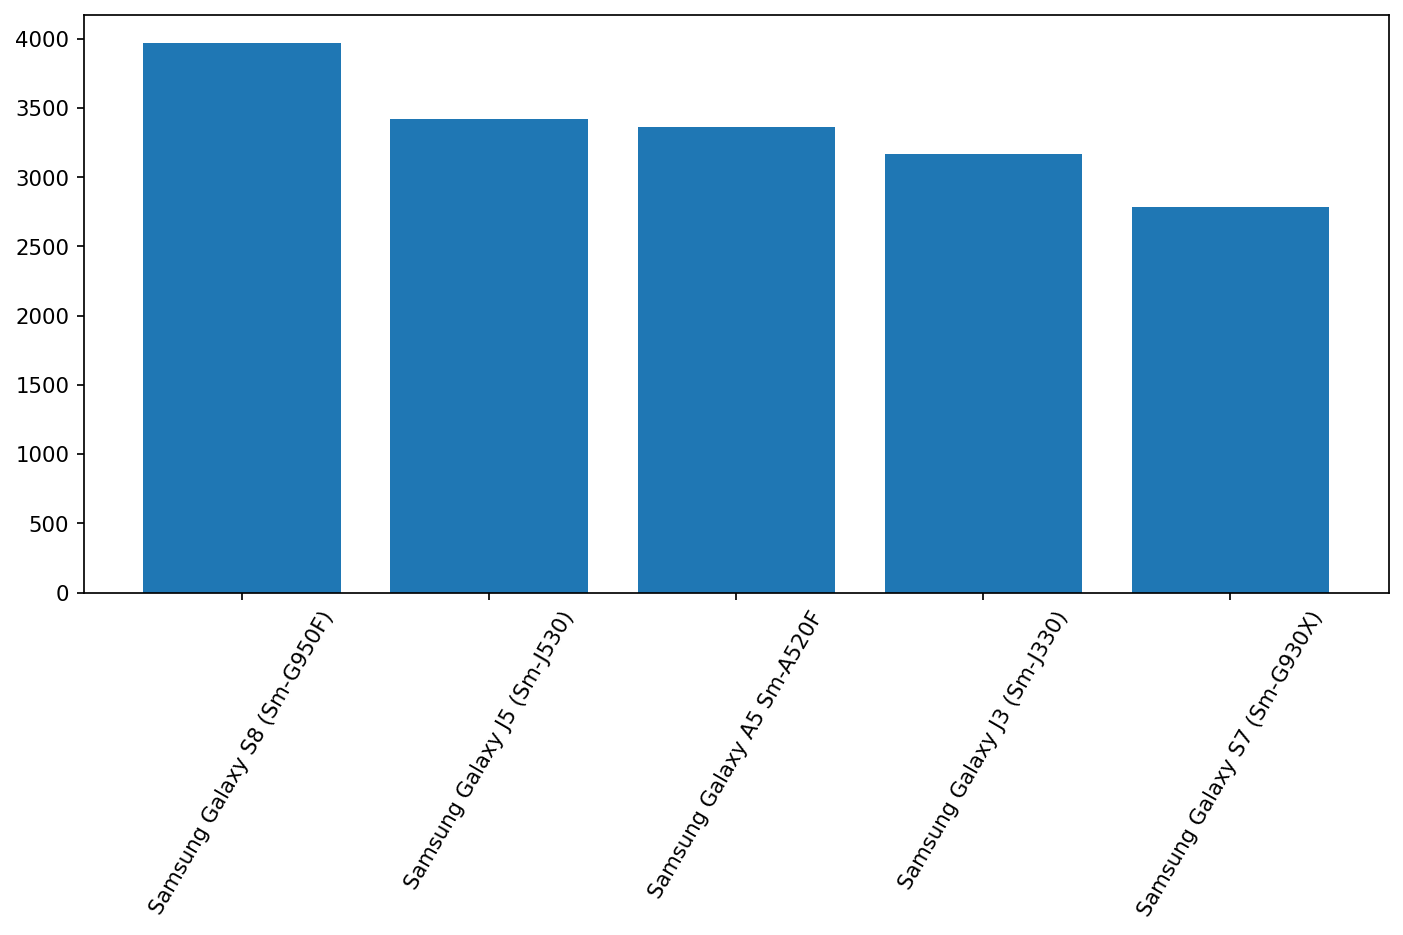

In [38]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_samsung.index, top_samsung['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

In [39]:
# cecking the top 5 per Apple
apple = top3.loc[top3['Handset Manufacturer'] == 'Apple']
top_apple = apple.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_apple

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),7906
Apple iPhone 6 (A1586),7115
Apple iPhone 7 (A1778),4827
Apple iPhone Se (A1723),4265
Apple iPhone 8 (A1905),4079


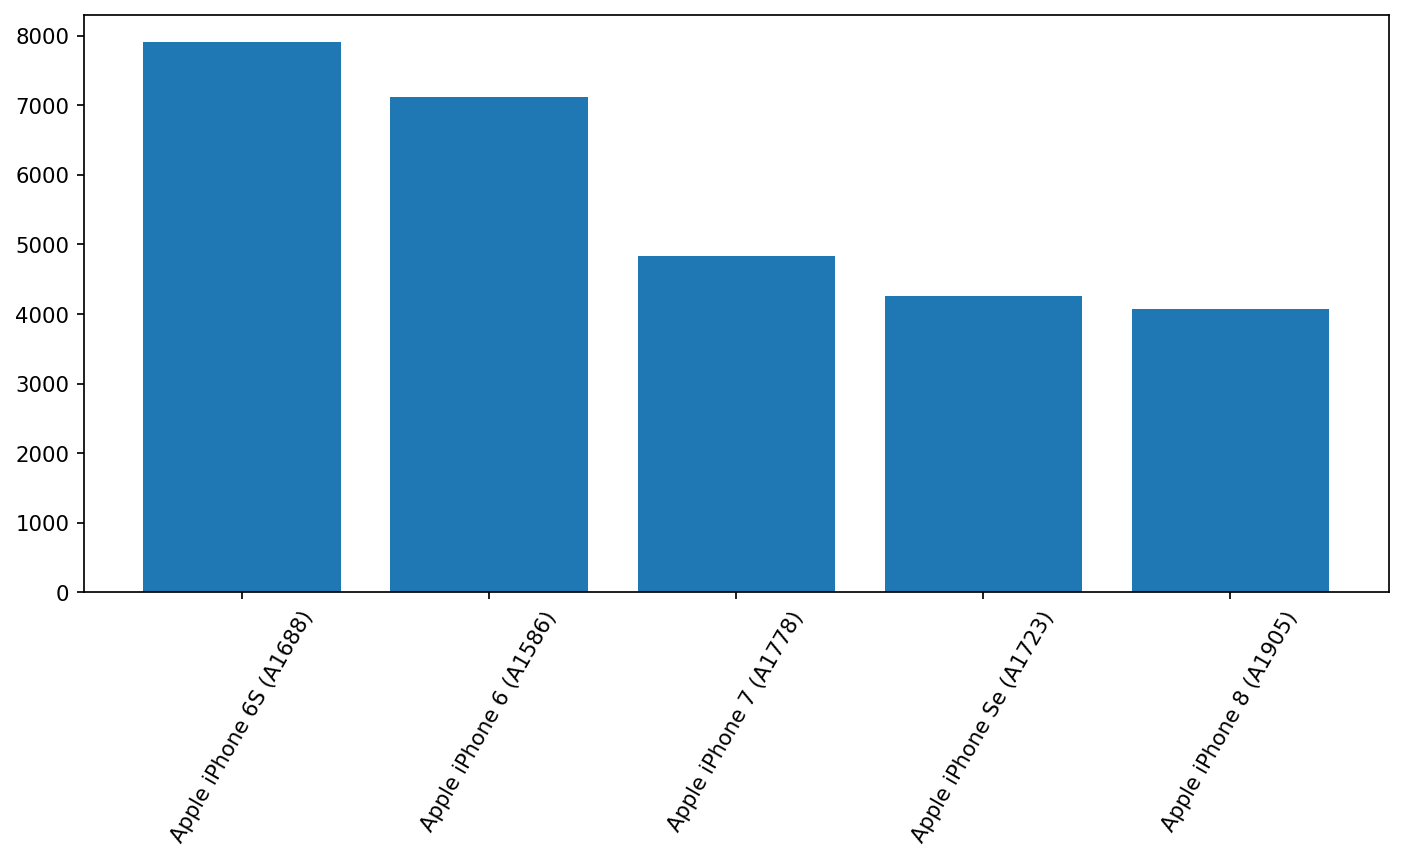

In [40]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_apple.index, top_apple['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

In [41]:
# cecking the top 5 per Huawei
huawei = top3.loc[top3['Handset Manufacturer'] == 'Huawei']
top_huawei = huawei.groupby('Handset Type').agg({'Handset Manufacturer': 'count'}).sort_values(by='Handset Manufacturer', ascending=False)[:5]
top_huawei

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,17596
Huawei E5180,1859
Huawei P20 Lite Huawei Nova 3E,1783
Huawei P20,1298
Huawei Y6 2018,874


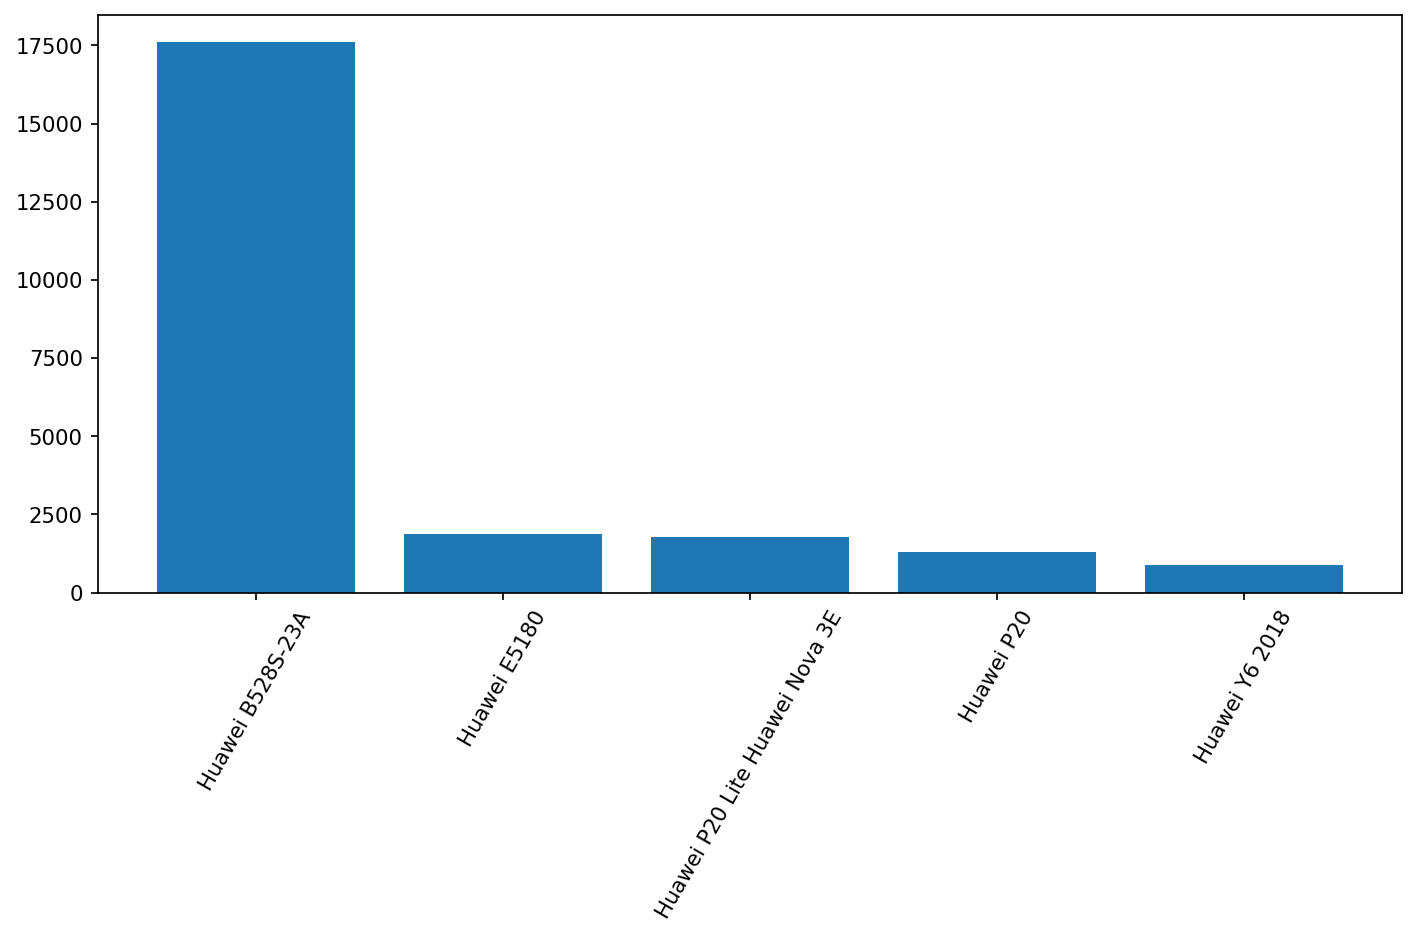

In [42]:
plt.figure(figsize = (11,5), dpi = 153)

plt.bar(top_huawei.index, top_huawei['Handset Manufacturer'])

plt.xticks(rotation=60)

plt.show()

### Interpretation & Recommendation

From the analysis above:
The *Huawei B528S-23A* has the highest users at 17596, and other Huawei phones have less than 2000 users.
Many Apple phones have a lot of users, with the top 2 having over 7000 users and the top 5 having over 4000 users.
Samsung phone users are evenly distributed with the top 4 having over 3000 users.

Therefore, users of the *Huawei B528S-23A, high end iphones and samsung users generally*  should be targeted more,

### Task 1.1
#### Aggregating per user on columns

In [43]:
# for number of xDR sessions 
n_df.groupby('MSISDN/Number')[['Bearer Id']].count().sort_values(by='Bearer Id', ascending=False)

,Bearer Id
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.365973e+10,16
3.366716e+10,13
3.376041e+10,12
...,...
3.366072e+10,1
3.366072e+10,1
3.366072e+10,1


In [44]:
# for session Duration 
n_df.groupby('MSISDN/Number')[['Dur. (ms)']].sum().sort_values(by='Dur. (ms)', ascending=False)

,Dur. (ms)
MSISDN/Number,
3.362578e+10,18553754.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
...,...
3.366708e+10,20468.0
3.366032e+10,20403.0
3.363156e+10,20367.0


In [45]:
# for total DL and UL data
n_df.groupby('MSISDN/Number')[['Total UL (MegaBytes)', 'Total DL (MegaBytes)']].sum().sort_values(by=\
                                                                                                  ['Total UL (MegaBytes)', 'Total DL (MegaBytes)'], ascending=False)

,Total UL (MegaBytes),Total DL (MegaBytes)
MSISDN/Number,,
3.362578e+10,152.930478,729.577380
3.362632e+10,142.400945,669.650721
3.365973e+10,134.864910,624.260321
3.376041e+10,113.141379,521.518890
3.366471e+10,108.323400,471.244453
...,...,...
3.367241e+10,0.000758,29.583834
3.365931e+10,0.000690,49.740692
3.366146e+10,0.000442,40.535385


In [46]:
# for total data volume (in Bytes) during this session for each application
for i in n_df.columns[-8:-3]:
    print(f"{n_df.groupby('MSISDN/Number')[[i]].sum().sort_values(by=i, ascending=False).head()}\n")

               Social Total (MegaByte)
MSISDN/Number                         
3.362578e+10              1.855375e+07
3.362632e+10              8.791927e+06
3.366716e+10              8.744914e+06
3.366469e+10              6.288730e+06
3.360313e+10              6.287761e+06

               Google Total (MegaByte)
MSISDN/Number                         
3.362632e+10                 43.374779
3.365973e+10                 35.412358
3.362578e+10                 27.135500
3.366716e+10                 24.247850
3.378632e+10                 23.974919

               Email Total (MegaByte)
MSISDN/Number                        
3.362632e+10               152.191852
3.362578e+10               142.307915
3.365973e+10               116.516345
3.378632e+10               110.254484
3.366716e+10               105.032696

               Youtube Total (MegaByte)
MSISDN/Number                          
3.362632e+10                  42.418782
3.362578e+10                  40.633966
3.378632e+10             

### Task 1.2

In [47]:
for i in n_df.columns[1:]:
    print(n_df[i].describe())
    print('\n')
    

count    1.248470e+05
mean     4.346667e+10
std      2.673141e+12
min      3.360100e+10
25%      3.365179e+10
50%      3.366373e+10
75%      3.368373e+10
max      8.823971e+14
Name: MSISDN/Number, dtype: float64


count    1.248470e+05
mean     1.169062e+05
std      7.726983e+04
min      1.994500e+04
25%      8.560350e+04
50%      8.862100e+04
75%      1.446730e+05
max      1.859336e+06
Name: Dur. (ms), dtype: float64


count    124847.000000
mean          0.004174
std           0.010492
min           0.000001
25%           0.000110
50%           0.000205
75%           0.002394
max           0.604122
Name: Social Media DL (MegaBytes), dtype: float64


count    124847.000000
mean          1.794540
std           1.036334
min           0.000028
25%           0.896530
50%           1.792937
75%           2.695520
max           3.586064
Name: Social Media UL (MegaBytes), dtype: float64


count    124847.000000
mean          0.032897
std           0.019006
min           0.000000
25%         

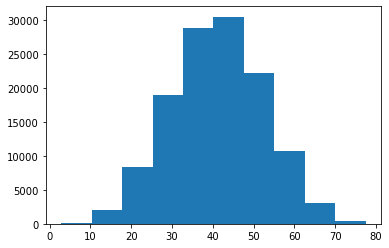

In [48]:
plt.hist(n_df['Total DL (MegaBytes)'])
plt.show()

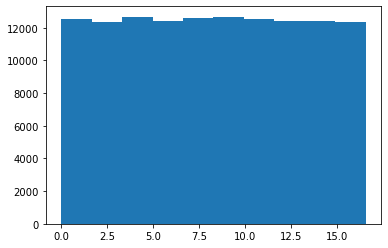

In [49]:
plt.hist(n_df['Total UL (MegaBytes)'])
plt.show()

<AxesSubplot:ylabel='Other UL (MegaBytes)'>

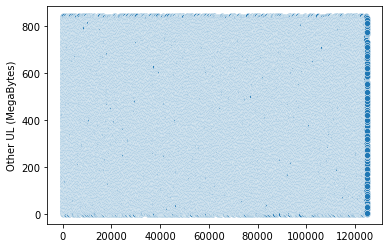

In [50]:
sns.scatterplot(n_df.index, n_df['Other UL (MegaBytes)'])

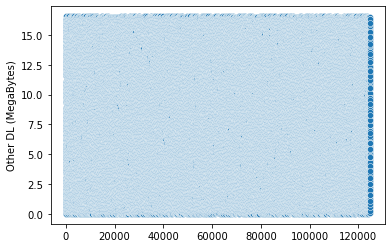

In [51]:
sns.scatterplot(n_df.index, n_df['Other DL (MegaBytes)'])
plt.show()

<AxesSubplot:ylabel='Gaming UL (MegaBytes)'>

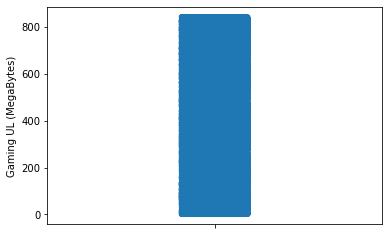

In [52]:
sns.stripplot(y=n_df['Gaming UL (MegaBytes)'])

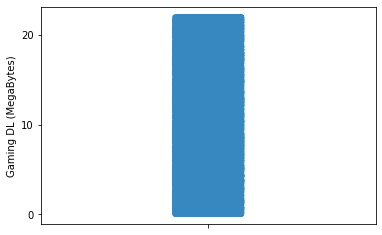

In [53]:
sns.stripplot(y=n_df['Gaming DL (MegaBytes)'], palette=("Blues_d"))
sns.set_context("poster")

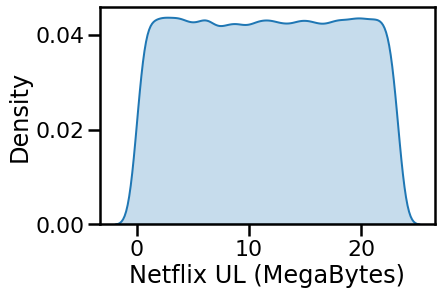

In [54]:
sns.kdeplot(x=n_df['Netflix UL (MegaBytes)'], palette=("Blues_d"), shade=True)
sns.set_context("poster")

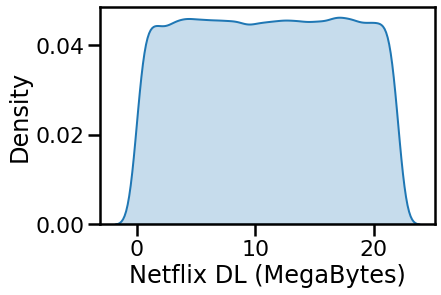

In [55]:
sns.kdeplot(x=n_df['Netflix DL (MegaBytes)'], palette=("Blues_d"), shade=True)
sns.set_context("poster")

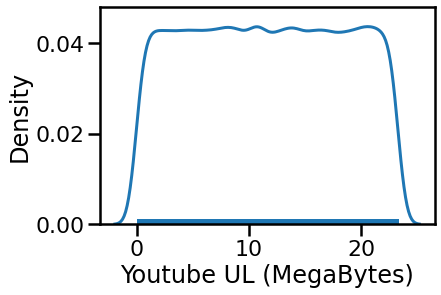

In [56]:
sns.distplot(n_df['Youtube UL (MegaBytes)'],rug=True, hist=False)
sns.set_context("poster")
             

<AxesSubplot:xlabel='Youtube DL (MegaBytes)', ylabel='Density'>

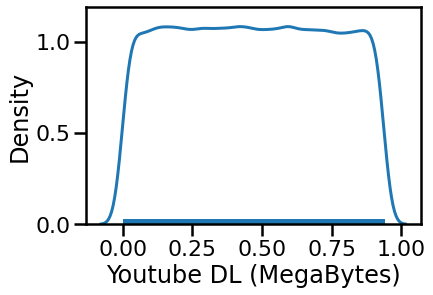

In [57]:
sns.distplot(n_df['Youtube DL (MegaBytes)'], rug=True, hist=False)

<AxesSubplot:xlabel='Email UL (MegaBytes)', ylabel='Density'>

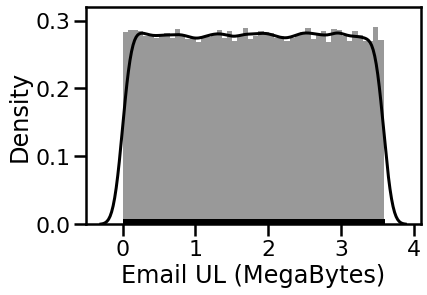

In [58]:
sns.distplot(n_df['Email UL (MegaBytes)'], rug=True, color='black')

<AxesSubplot:xlabel='Email DL (MegaBytes)', ylabel='Density'>

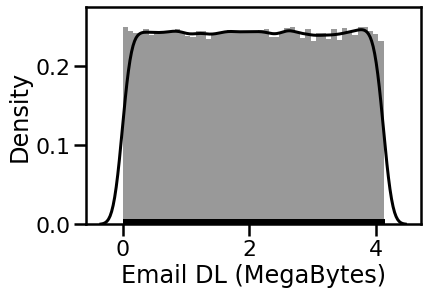

In [59]:
sns.distplot(n_df['Email DL (MegaBytes)'], rug=True, color='black')

<AxesSubplot:xlabel='Google UL (MegaBytes)'>

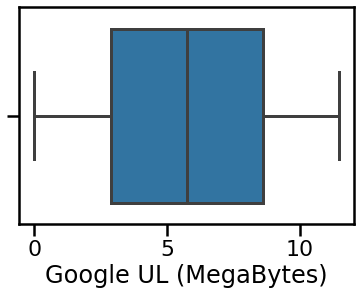

In [60]:
sns.boxplot(n_df['Google UL (MegaBytes)'])

<AxesSubplot:xlabel='Google DL (MegaBytes)'>

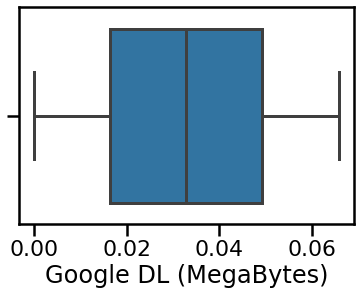

In [61]:
sns.boxplot(n_df['Google DL (MegaBytes)'])

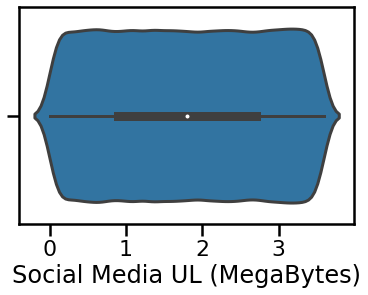

In [62]:
sns.violinplot(n_df['Social Media UL (MegaBytes)'], orient='vertical')
sns.set_context('poster')

<AxesSubplot:xlabel='Social Media DL (MegaBytes)'>

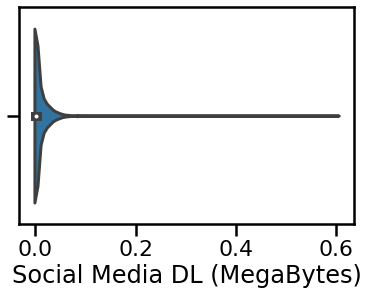

In [63]:
sns.violinplot(n_df['Social Media DL (MegaBytes)'], orient='vertical')

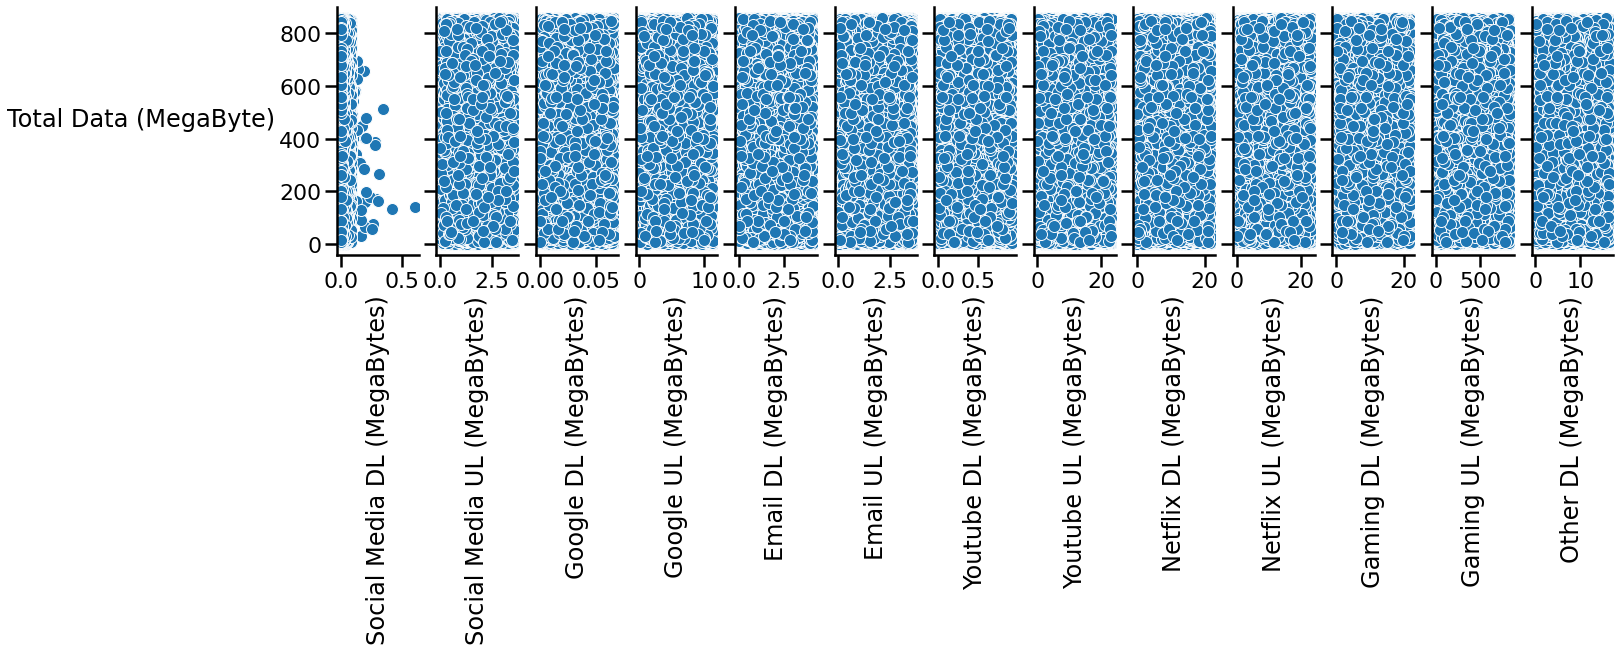

In [64]:
pp = sns.pairplot(data=n_df,x_vars=n_df.columns[3:16], y_vars=['Total Data (MegaByte)'])

for ax in pp.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    #set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
pp.fig.set_size_inches(19,7)

#### Segmenting Users Into top 5 decile class

In [65]:
a = n_df['Dur. (ms)']

# function to reduce noise and create unique bin edges
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

# creating column with decile rank based on duration
n_df['DecileRank']= pd.qcut(a + jitter(a), q = 10, labels = False)

In [66]:
# creating dataframe with top 5 decile class
top_5_decile = n_df.loc[n_df['DecileRank'] >= 5]
top_5_decile

,Bearer Id,MSISDN/Number,Dur. (ms),Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes),Social Total (MegaByte),Google Total (MegaByte),Email Total (MegaByte),Youtube Total (MegaByte),Netflix Total (MegaByte),Gaming Total (MegaByte),Other Total (MegaByte),Total Data (MegaByte),DecileRank
0,7.349883e+18,3.361149e+10,526592.0,0.000415,2.294627,0.019030,6.456091,0.506961,2.513243,0.393681,4.563621,14.169882,17.059017,10.885928,398.294168,6.422467,233.785994,0.186202,32.584151,526592.000415,2.313657,6.963052,2.906924,18.733503,27.944945,404.716635,233.972196,9
1,7.349883e+18,3.376260e+10,513490.0,0.000262,0.761984,0.007770,5.759002,3.702192,2.047662,0.480276,2.761297,15.589991,12.044624,15.493345,163.223398,6.214870,335.052892,1.188547,42.676991,513490.000262,0.769754,9.461194,2.527938,18.351288,27.537969,169.438268,336.241439,9
2,1.311448e+19,3.365257e+10,523596.0,0.000214,3.144024,0.041564,1.351689,4.018918,0.044235,0.632796,22.993505,6.144069,3.310607,2.003133,263.171478,11.657292,813.933231,2.115386,26.613158,523596.000214,3.185588,5.370607,0.677031,29.137574,5.313740,274.828770,816.048617,9
3,7.349883e+18,3.376260e+10,536118.0,0.000352,3.267043,0.034163,3.426480,2.772129,1.739103,0.752120,9.977575,8.673359,23.100171,18.593023,330.470354,15.340630,487.881365,6.392403,52.557827,536118.000352,3.301206,6.198609,2.491223,18.650934,41.693194,345.810984,494.273768,9
4,1.311448e+19,3.366169e+10,550527.0,0.000458,0.000795,0.055232,5.391977,2.197776,3.345863,0.074124,15.306858,3.049582,4.361071,21.274681,509.981063,10.223865,382.268762,10.259263,47.134523,550527.000458,0.056027,7.589753,3.419987,18.356440,25.635752,520.204928,392.528025,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124840,1.311448e+19,3.364566e+10,113545.0,0.000170,0.843776,0.049091,8.169508,0.753106,1.310061,0.255481,23.043782,19.176074,18.762809,9.591310,810.666072,14.858904,777.865837,14.693970,59.377936,113545.000170,0.892867,8.922614,1.565542,42.219856,28.354119,825.524976,792.559807,6
124843,7.349883e+18,3.366345e+10,97970.0,0.000102,2.344568,0.007613,2.229420,2.185941,1.954414,0.167304,13.877234,8.288284,19.350146,21.293148,626.893062,4.735033,712.180387,2.457758,39.135081,97970.000102,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145,5
124844,1.311448e+19,3.362189e+10,98249.0,0.000108,1.245845,0.014394,3.850890,2.734579,1.525734,0.532543,22.660510,1.855903,9.963942,5.065760,553.539484,13.394316,121.100856,11.314729,34.912224,98249.000108,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585,5
124845,1.311448e+19,3.361962e+10,97910.0,0.000082,0.801547,0.021562,4.189773,3.567494,2.228270,0.622644,8.817106,8.305402,3.322253,13.172589,352.536971,2.529475,814.713113,1.406930,29.626096,97910.000082,0.823109,7.757267,2.850914,17.122508,16.494842,355.066446,816.120043,5


In [67]:
# count = 5
# for i in
print(top_5_decile.loc[n_df['DecileRank'] == 5].groupby('DecileRank')[['Total Data (MegaByte)'\
                                                                ]].sum().sort_values(by='Total Data (MegaByte)', ascending=False))

            Total Data (MegaByte)
DecileRank                       
5                    5.369654e+06


In [68]:
# functiion to compute total data per decile class
count = 5
for i in range(5):
    print(f"{top_5_decile.loc[n_df['DecileRank'] == count].groupby('DecileRank')[['Total Data (MegaByte)']].sum().sort_values(by='Total Data (MegaByte)', ascending=False)}\n\n")
    count+=1

            Total Data (MegaByte)
DecileRank                       
5                    5.369654e+06


            Total Data (MegaByte)
DecileRank                       
6                    5.344327e+06


            Total Data (MegaByte)
DecileRank                       
7                    5.356173e+06


            Total Data (MegaByte)
DecileRank                       
8                    5.338694e+06


            Total Data (MegaByte)
DecileRank                       
9                    5.364396e+06




#### Performing Correlation Analysis

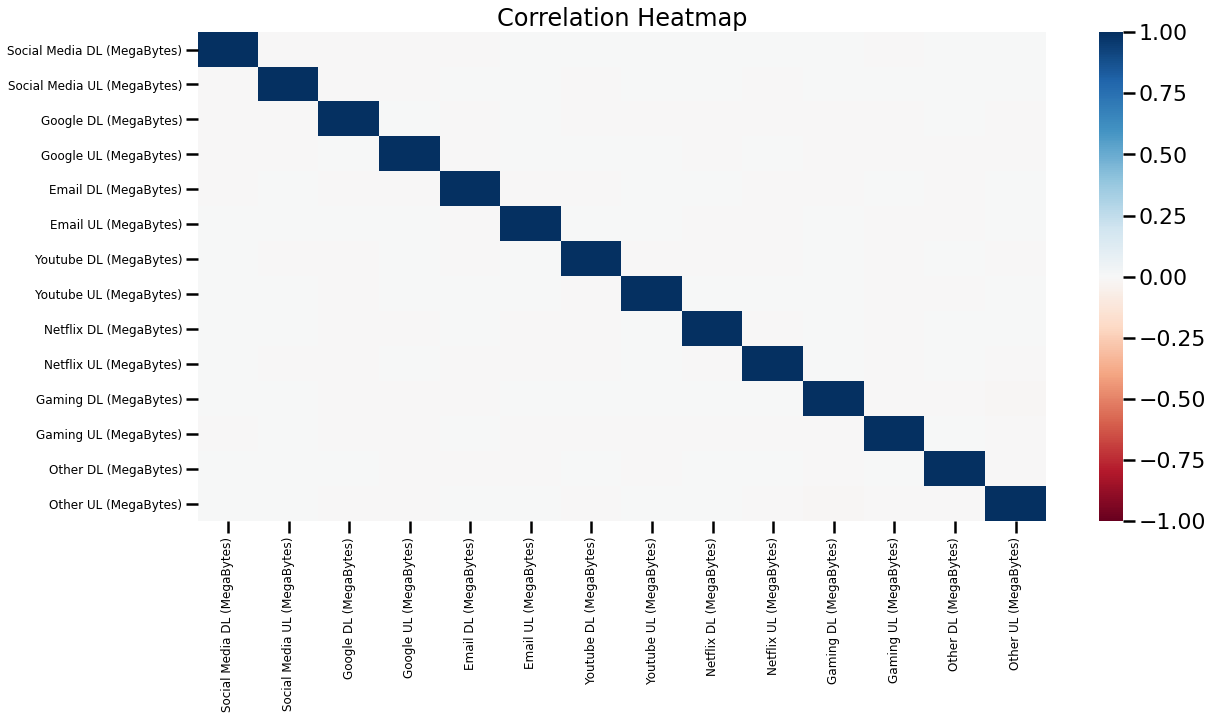

In [69]:
plt.figure(figsize = (19, 9))
s = sns.heatmap(n_df.iloc[:, 3:17].corr(),
#                annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1
               )
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
# sns.set_context('talk')
plt.show()


#### Performing Principal Component Analysis

In [70]:
# first we standardize the data.
scaler = StandardScaler()
std_data = n_df.drop(['Bearer Id', 'Dur. (ms)', 'MSISDN/Number'], axis=1)
std_data = std_data.iloc[:, :16]
segmentation_std = scaler.fit_transform(std_data)

In [71]:
# PCA finds a subset of components, which explain the variance in the data.
pca = PCA(n_components=3)

In [72]:
# Fitting PCA with our standardized data.
pca.fit(segmentation_std)

PCA(n_components=3)

In [73]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.12470291, 0.06361942, 0.06326067])

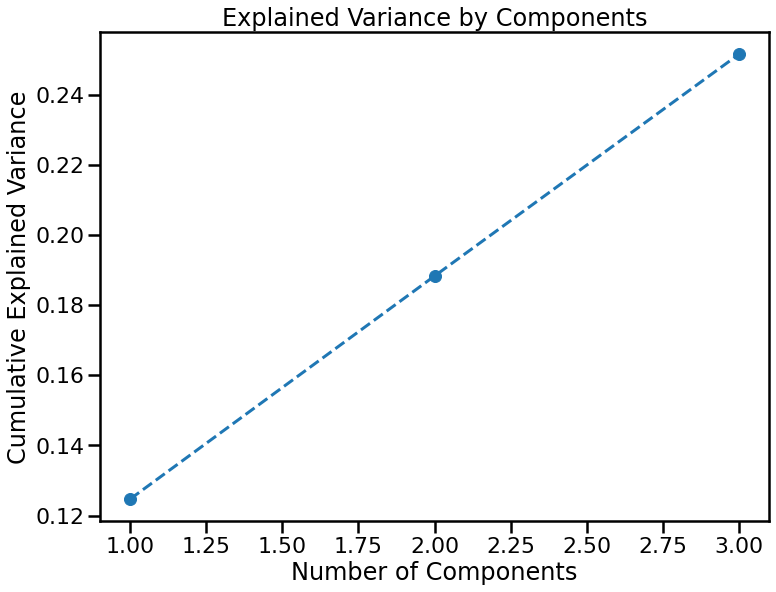

In [74]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [75]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = std_data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
Component 1,-0.006438,-0.001446,0.008589,0.006148,-0.073497,-0.002180,-0.018611,0.009442,-0.399970,-0.004239,-0.403249,0.000482,-0.287809,-0.007899,-0.296227,-0.707638
Component 2,0.222105,0.349111,-0.053736,-0.191930,0.127372,0.125492,-0.252169,0.238883,0.182783,-0.279104,-0.306920,-0.061557,-0.049143,0.622926,0.191527,-0.002775
Component 3,0.153573,-0.025738,-0.152019,0.188529,0.066004,0.146155,-0.208988,0.552407,0.167149,0.342877,0.331950,-0.241965,-0.339710,-0.014111,-0.335708,-0.002991


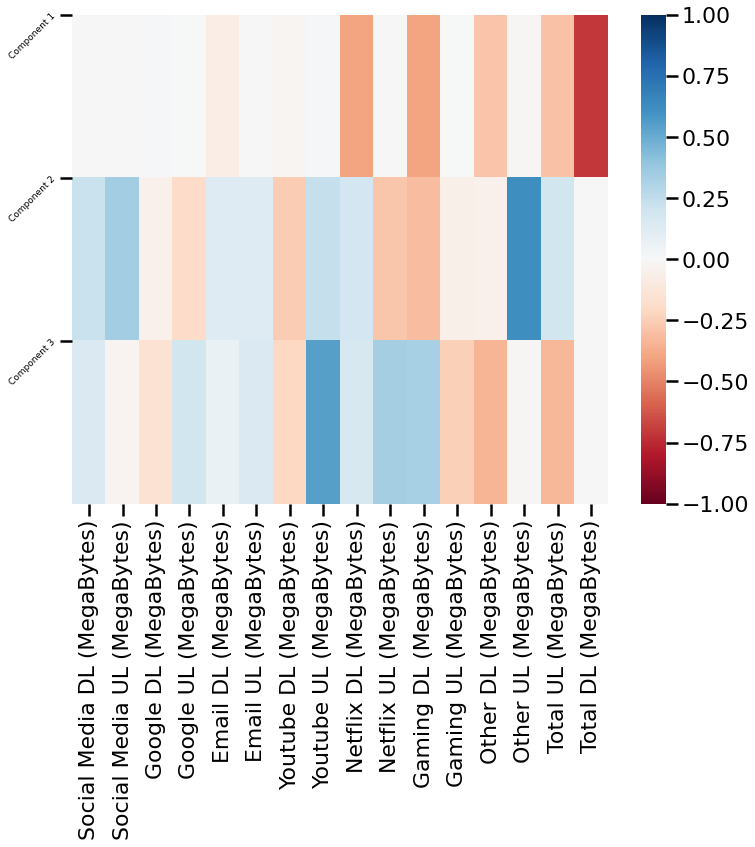

In [76]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize = (12, 9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu')
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)
plt.show()

### Task 2 - User Engagement Analysis

#### Aggregating Engagement Metrics per Customer Id 

In [77]:
# Top 10 Session Frequency 
sess = n_df.groupby('MSISDN/Number')[['Bearer Id']].count().sort_values(by='Bearer Id', ascending=False)
sess.iloc[:10,:]

,Bearer Id
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.365973e+10,16
3.366716e+10,13
3.376041e+10,12
3.378632e+10,12
3.367588e+10,12
3.360452e+10,12
3.360313e+10,12


In [78]:
# Top 10 Session Duration 
dur = n_df.groupby('MSISDN/Number')[['Dur. (ms)']].sum().sort_values(by='Dur. (ms)', ascending=False)
dur.iloc[:10,:]

,Dur. (ms)
MSISDN/Number,
3.362578e+10,18553754.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366284e+10,5659733.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0
3.360452e+10,5207990.0


In [79]:
# Top 10 Session Traffic
traffic = n_df.groupby('MSISDN/Number')[['Total Data (MegaByte)']].sum().sort_values(by=\
                                                                                                  ['Total Data (MegaByte)'], ascending=False)
traffic.iloc[:10, :]

,Total Data (MegaByte)
MSISDN/Number,
3.362632e+10,8167.877776
3.362578e+10,6354.583086
3.360313e+10,6326.670874
3.365973e+10,6317.415487
3.367588e+10,5334.659296
3.362695e+10,5305.447882
3.365836e+10,5013.650844
3.363004e+10,4978.853178
3.366469e+10,4960.857897


In [80]:
# combining engagement metrics into a d, atframe
engagement_metrics = pd.concat([sess, dur, traffic], axis=1)
engagement_metrics.head()

,Bearer Id,Dur. (ms),Total Data (MegaByte)
MSISDN/Number,,,
3.360100e+10,1,116720.0,386.570872
3.360100e+10,1,181230.0,281.710071
3.360100e+10,1,134969.0,501.693672
3.360101e+10,1,49878.0,35.279702
3.360101e+10,2,253983.0,492.372777


#### Normalizing Engagement Metrics and Classifying Customers

In [81]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# normalize the exponential data with boxcox
normalized_data = norm.fit_transform(engagement_metrics)

In [82]:
# Fitting  K-Means to the dataset and predicting the clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
#The predicted cluster centers are stored in y_kmeans
y_kmeans = kmeans.fit_predict(normalized_data)

In [83]:
#Adding the predicted clusters
engagement_metrics.loc[:, 'Clusters'] = y_kmeans

#Now, different observations has been assigned to different cluster centers (centroids)
engagement_metrics

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters
MSISDN/Number,,,,
3.360100e+10,1,116720.0,386.570872,1
3.360100e+10,1,181230.0,281.710071,1
3.360100e+10,1,134969.0,501.693672,1
3.360101e+10,1,49878.0,35.279702,1
3.360101e+10,2,253983.0,492.372777,1
...,...,...,...,...
3.378998e+10,1,178525.0,307.067756,1
3.379000e+10,1,140988.0,211.115113,1
3.197021e+12,1,877385.0,470.526473,1


#### Computing Statistics For Each Cluster

In [84]:
# Stats for 1st cluster (Clusters = 0)
engagement_metrics.loc[engagement_metrics['Clusters'] == 0].describe()

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters
count,29504.000000,29504.000000,29504.000000,29504.0
mean,1.413266,116157.598088,802.361935,0.0
std,0.775477,70513.451231,422.465964,0.0
min,1.000000,19945.000000,111.196086,0.0
25%,1.000000,84856.250000,552.536216,0.0
50%,1.000000,89955.000000,713.550405,0.0
75%,2.000000,133427.000000,847.668450,0.0
max,11.000000,864066.000000,4605.369289,0.0


In [85]:
# Stats for 2nd cluster (Clusters = 1)
engagement_metrics.loc[engagement_metrics['Clusters'] == 1].describe()

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters
count,55090.000000,5.509000e+04,55090.000000,55090.0
mean,1.402814,1.988458e+05,476.523290,1.0
std,0.848422,2.198741e+05,430.644784,0.0
min,1.000000,2.046800e+04,0.149045,1.0
25%,1.000000,9.855900e+04,184.927852,1.0
50%,1.000000,1.569485e+05,372.579166,1.0
75%,2.000000,2.288535e+05,642.300801,1.0
max,18.000000,1.855375e+07,8167.877776,1.0


In [86]:
# Stats for 3rd cluster (Clusters = 2)
engagement_metrics.loc[engagement_metrics['Clusters'] == 2].describe()

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters
count,4749.000000,4749.000000,4749.000000,4749.0
mean,1.235839,45032.978311,787.561148,2.0
std,0.457977,20208.036095,288.655772,0.0
min,1.000000,20308.000000,296.930646,2.0
25%,1.000000,30568.000000,604.763113,2.0
50%,1.000000,38659.000000,737.356649,2.0
75%,1.000000,54355.000000,833.807353,2.0
max,4.000000,175910.000000,2517.412475,2.0


#### Determining Top 10 Users Per Application

In [87]:
# Aggregating total traffic of applications per user.
# Printing top ten users
for i in n_df.columns[-8:-3]:
    print(f"{n_df.groupby('MSISDN/Number')[[i]].sum().sort_values(by=i, ascending=False).iloc[:10,:]}\n\n\n")

               Google Total (MegaByte)
MSISDN/Number                         
3.362632e+10                 43.374779
3.365973e+10                 35.412358
3.362578e+10                 27.135500
3.366716e+10                 24.247850
3.378632e+10                 23.974919
3.366907e+10                 23.800834
3.360313e+10                 23.077825
3.365849e+10                 23.000066
3.366159e+10                 22.434016
3.366553e+10                 21.733705



               Email Total (MegaByte)
MSISDN/Number                        
3.362632e+10               152.191852
3.362578e+10               142.307915
3.365973e+10               116.516345
3.378632e+10               110.254484
3.366716e+10               105.032696
3.367588e+10                94.734585
3.365936e+10                91.041018
3.369900e+10                90.983749
3.366471e+10                90.389372
3.366646e+10                89.320737



               Youtube Total (MegaByte)
MSISDN/Number                 

#### Plotting Top 3 Most Used Applications

In [88]:
# checking for which applications were the most used
check = []
for i in n_df.columns[-8:-3]:
    check.append((n_df[i].sum(), i))

# sorts list value in descending order
check.sort(reverse=True)
check

[(2828285.688163639, 'Netflix Total (MegaByte)'),
 (2825537.3905295385, 'Gaming Total (MegaByte)'),
 (974257.2113075457, 'Email Total (MegaByte)'),
 (281879.7170153099, 'Youtube Total (MegaByte)'),
 (228149.99660320798, 'Google Total (MegaByte)')]

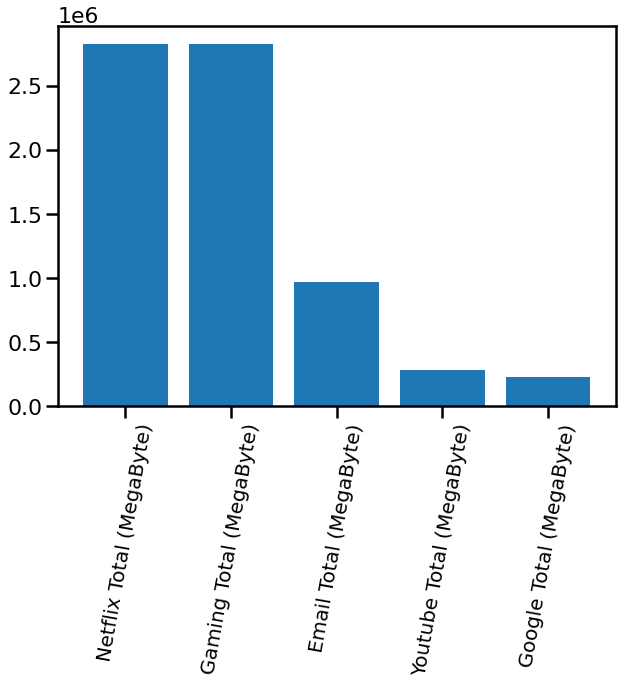

In [89]:
# plotting apps
plt.figure(figsize=(10,7))

values = [i[0] for i in check]
labels = [i[1] for i in check]

plt.bar(labels, values)

plt.xticks(rotation=80, fontsize=20)

plt.show()

In [90]:
# function to plot histogram of specified column
def plot_hist(df, col, bins = None):
    plt.figure(figsize=(10,7))
    plt.hist(df[col], bins=bins)
    plt.title(col)
    plt.show()

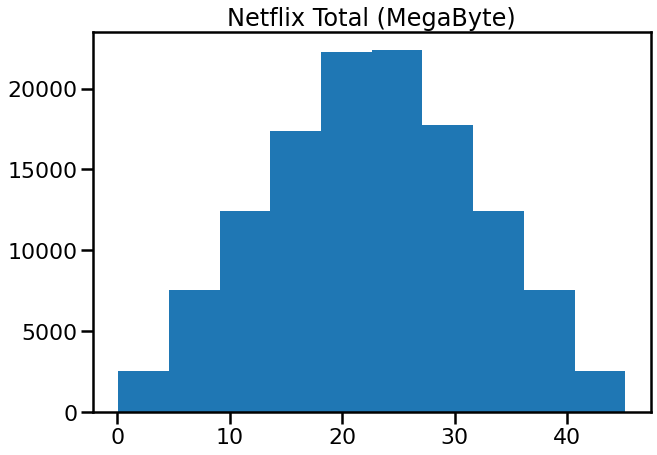

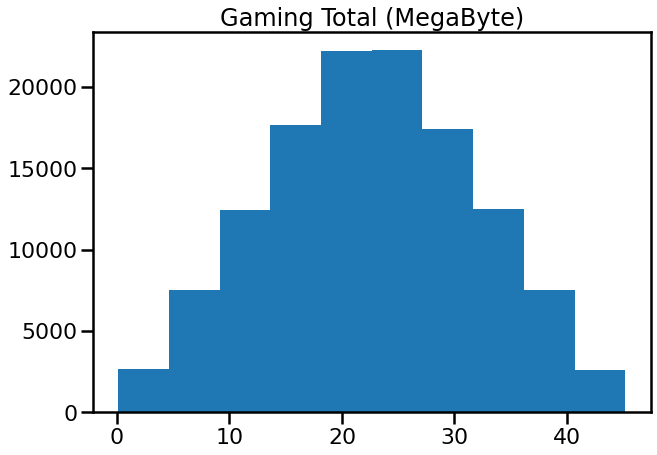

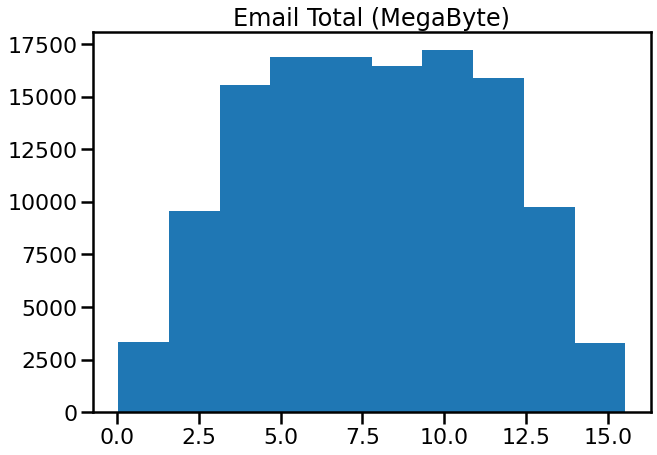

In [91]:
# plotting top 3 most used 
for i in check[:3]:
    nil, name = i
    plot_hist(n_df,name)

In [92]:
n_df.groupby('MSISDN/Number')[['Total UL (MegaBytes)', 'Total DL (MegaBytes)']].sum()

,Total UL (MegaBytes),Total DL (MegaBytes)
MSISDN/Number,,
3.360100e+10,9.473882,36.053108
3.360100e+10,2.152370,36.104459
3.360100e+10,6.607171,39.306820
3.360101e+10,10.031701,20.327526
3.360101e+10,12.014169,60.009249
...,...,...
3.378998e+10,2.520929,26.284717
3.379000e+10,6.479040,35.732243
3.197021e+12,2.848373,37.295915


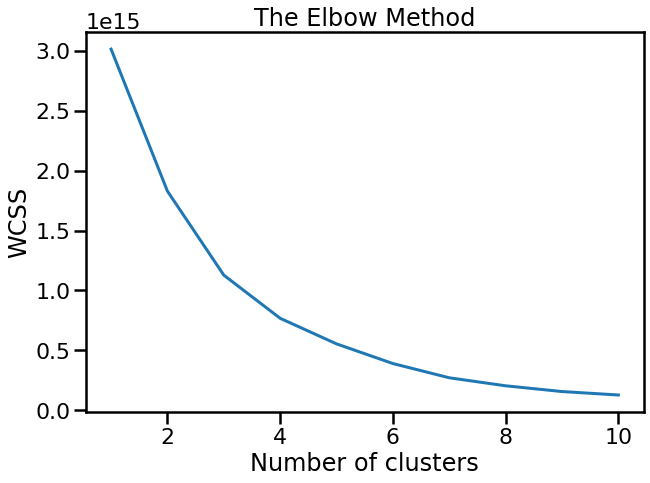

In [93]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  #Test 1 to 10 differnt clusters
#Loop over the indented statements 10 times to see how distance reduces till it becomes steady 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(engagement_metrics)  #Train the model for all the 10 clusters and append into wcss list
    
    '''kmeans.fit(engagement_metrics) generates the following parameters:
    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)
    inertia: Sum of squared distances of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) #Add each Sum of squared distances to wcss[] list
    
plt.figure(figsize=(10,7))
plt.plot(range(1, 11), wcss) # plot the ten different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Task 3 - Experience Analytics

In [94]:
# reloading data for task 3
ea_data = pd.read_csv('Week1_challenge_data_source.csv')

#### Task 3.1

In [95]:
# checking columns to be used
ea_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [96]:
# adding columns to be dropped to a list
remove = []
for i in ea_data.columns[1:]:
    if 'RTT' in i: continue
    elif '%' in i:
        remove.append(i)
    elif 'HTTP' in i:
        remove.append(i)
    elif 'TP' in i: continue
    elif 'TCP' in i: continue
    elif 'Handset' in i: continue
    elif 'Number' in i: continue
    else:
        remove.append(i)

In [97]:
# dropping columns
ea_df = ea_data.drop(remove, axis=1)

In [98]:
# checking the dataframe
ea_df

,Bearer Id,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Manufacturer,Handset Type
0,1.311448e+19,3.366496e+10,42.0,5.0,23.0,44.0,NaN,NaN,Samsung,Samsung Galaxy A5 Sm-A520F
1,1.311448e+19,3.368185e+10,65.0,5.0,16.0,26.0,NaN,NaN,Samsung,Samsung Galaxy J5 (Sm-J530)
2,1.311448e+19,3.376063e+10,NaN,NaN,6.0,9.0,NaN,NaN,Samsung,Samsung Galaxy A8 (2018)
3,1.311448e+19,3.375034e+10,NaN,NaN,44.0,44.0,NaN,NaN,undefined,undefined
4,1.311448e+19,3.369980e+10,NaN,NaN,6.0,9.0,NaN,NaN,Samsung,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,3.365069e+10,32.0,0.0,52.0,65.0,NaN,NaN,Apple,Apple iPhone 8 Plus (A1897)
149997,7.349883e+18,3.366345e+10,27.0,2.0,23.0,54.0,NaN,NaN,Apple,Apple iPhone Se (A1723)
149998,1.311448e+19,3.362189e+10,43.0,6.0,43.0,47.0,NaN,NaN,Apple,Apple iPhone Xs (A2097)
149999,1.311448e+19,3.361962e+10,37.0,5.0,34.0,37.0,NaN,NaN,Huawei,Huawei Fig-Lx1


In [99]:
# checking for missing values
ea_df.isnull().sum()

Bearer Id                        991
MSISDN/Number                   1066
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP DL (kbps)            1
Avg Bearer TP UL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
Handset Manufacturer             572
Handset Type                     572
dtype: int64

In [100]:
# checking skewness of columns
ea_df.skew(axis = 0, skipna = True)

Bearer Id                        0.026666
MSISDN/Number                  332.155856
Avg RTT DL (ms)                 62.907828
Avg RTT UL (ms)                 28.457415
Avg Bearer TP DL (kbps)          2.589437
Avg Bearer TP UL (kbps)          4.503413
TCP DL Retrans. Vol (Bytes)     15.951809
TCP UL Retrans. Vol (Bytes)     84.113393
dtype: float64

In [101]:
# function to fill missing values with mode
def mode_fill(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    
    return df[col]
    
# function to fill missing values with median
def median_fill(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    
    return df[col]

In [102]:
# loop to fill specified columns with median
for i in ea_df.columns[2:8]:
    ea_df[i] = median_fill(ea_df, i)
    
ea_df.isnull().sum()

Bearer Id                       991
MSISDN/Number                  1066
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
Handset Manufacturer            572
Handset Type                    572
dtype: int64

In [103]:
columns = list(ea_df.columns[:2])
columns.extend(['Handset Manufacturer','Handset Type'])
for i in columns:
    ea_df[i] = mode_fill(ea_df, i)
ea_df.isnull().sum()

Bearer Id                      0
MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Handset Manufacturer           0
Handset Type                   0
dtype: int64

In [104]:
ea_df['Handset Type'].replace('undefined', ea_df['Handset Type'].mode()[0], inplace=True)
ea_df['Handset Manufacturer'].replace('undefined', ea_df['Handset Manufacturer'].mode()[0], inplace=True)
ea_df

,Bearer Id,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Manufacturer,Handset Type
0,1.311448e+19,3.366496e+10,42.0,5.0,23.0,44.0,1330.0,1330.0,Samsung,Samsung Galaxy A5 Sm-A520F
1,1.311448e+19,3.368185e+10,65.0,5.0,16.0,26.0,1330.0,1330.0,Samsung,Samsung Galaxy J5 (Sm-J530)
2,1.311448e+19,3.376063e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Galaxy A8 (2018)
3,1.311448e+19,3.375034e+10,28.0,5.0,44.0,44.0,1330.0,1330.0,Apple,Huawei B528S-23A
4,1.311448e+19,3.369980e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,3.365069e+10,32.0,0.0,52.0,65.0,1330.0,1330.0,Apple,Apple iPhone 8 Plus (A1897)
149997,7.349883e+18,3.366345e+10,27.0,2.0,23.0,54.0,1330.0,1330.0,Apple,Apple iPhone Se (A1723)
149998,1.311448e+19,3.362189e+10,43.0,6.0,43.0,47.0,1330.0,1330.0,Apple,Apple iPhone Xs (A2097)
149999,1.311448e+19,3.361962e+10,37.0,5.0,34.0,37.0,1330.0,1330.0,Huawei,Huawei Fig-Lx1


In [105]:
ea_df['Total TCP'] = ea_df['TCP DL Retrans. Vol (Bytes)'] + ea_df['TCP UL Retrans. Vol (Bytes)']
ea_df['Total RTT'] = ea_df['Avg RTT DL (ms)'] + ea_df['Avg RTT UL (ms)']
ea_df['Total TP'] = ea_df['Avg Bearer TP DL (kbps)'] + ea_df['Avg Bearer TP UL (kbps)']
ea_df

,Bearer Id,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Manufacturer,Handset Type,Total TCP,Total RTT,Total TP
0,1.311448e+19,3.366496e+10,42.0,5.0,23.0,44.0,1330.0,1330.0,Samsung,Samsung Galaxy A5 Sm-A520F,2660.0,47.0,67.0
1,1.311448e+19,3.368185e+10,65.0,5.0,16.0,26.0,1330.0,1330.0,Samsung,Samsung Galaxy J5 (Sm-J530),2660.0,70.0,42.0
2,1.311448e+19,3.376063e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Galaxy A8 (2018),2660.0,33.0,15.0
3,1.311448e+19,3.375034e+10,28.0,5.0,44.0,44.0,1330.0,1330.0,Apple,Huawei B528S-23A,2660.0,33.0,88.0
4,1.311448e+19,3.369980e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Sm-G390F,2660.0,33.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,3.365069e+10,32.0,0.0,52.0,65.0,1330.0,1330.0,Apple,Apple iPhone 8 Plus (A1897),2660.0,32.0,117.0
149997,7.349883e+18,3.366345e+10,27.0,2.0,23.0,54.0,1330.0,1330.0,Apple,Apple iPhone Se (A1723),2660.0,29.0,77.0
149998,1.311448e+19,3.362189e+10,43.0,6.0,43.0,47.0,1330.0,1330.0,Apple,Apple iPhone Xs (A2097),2660.0,49.0,90.0
149999,1.311448e+19,3.361962e+10,37.0,5.0,34.0,37.0,1330.0,1330.0,Huawei,Huawei Fig-Lx1,2660.0,42.0,71.0


In [106]:
ea_df.groupby('MSISDN/Number')[['Total TCP']].mean()

,Total TCP
MSISDN/Number,
3.360100e+10,2660.0
3.360100e+10,2660.0
3.360100e+10,2660.0
3.360101e+10,2396.0
3.360101e+10,4686746.0
...,...
3.379000e+10,218045.0
3.379000e+10,2660.0
3.197021e+12,2660.0


In [107]:
ea_df.groupby('MSISDN/Number')[['Total RTT']].mean()

,Total RTT
MSISDN/Number,
3.360100e+10,46.0
3.360100e+10,31.0
3.360100e+10,33.0
3.360101e+10,84.0
3.360101e+10,59.5
...,...
3.379000e+10,52.0
3.379000e+10,40.0
3.197021e+12,33.0


In [108]:
ea_df.groupby('MSISDN/Number')[['Total TP']].mean()

,Total TP
MSISDN/Number,
3.360100e+10,76.0
3.360100e+10,99.0
3.360100e+10,97.0
3.360101e+10,248.0
3.360101e+10,28422.0
...,...
3.379000e+10,10365.0
3.379000e+10,116.0
3.197021e+12,1.0


In [109]:
ea_df.groupby('MSISDN/Number')[['Handset Type']].count()

,Handset Type
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


#### Task 3.2

#### Computing top/bottom 10 values by frequency

In [110]:
# top 10 TCP values
tcp = ea_df.groupby('Total TCP').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)
tcp.iloc[:10, :]

,MSISDN/Number
Total TCP,
2660.0,85791
2624.0,650
2648.0,247
3990.0,239
5320.0,148
1368.0,147
1422.0,138
2550.0,115
3966.0,111


In [111]:
# bottom 10 TCP values
tcp.iloc[-10:, :]

,MSISDN/Number
Total TCP,
2.916930e+05,1
2.917380e+05,1
2.918330e+05,1
2.918470e+05,1
2.918790e+05,1
2.919220e+05,1
2.919370e+05,1
2.919900e+05,1
2.920180e+05,1


In [112]:
# top 10 RTT values
rtt = ea_df.groupby('Total RTT').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)
rtt.iloc[:10, :]

,MSISDN/Number
Total RTT,
33.0,29062
29.0,4997
39.0,4222
38.0,2761
40.0,2647
30.0,2596
28.0,2425
49.0,2219
41.0,1978


In [113]:
# bottom 10 RTT values
rtt.iloc[-10:, :]

,MSISDN/Number
Total RTT,
1920.0,1
1923.0,1
1925.0,1
1926.0,1
1927.0,1
1928.0,1
1932.0,1
1937.0,1
1941.0,1


In [114]:
# top 10 Throughput values
tp = ea_df.groupby('Total TP').agg({'MSISDN/Number': 'count'}).sort_values(by='MSISDN/Number', ascending=False)
tp.iloc[:10, :]

,MSISDN/Number
Total TP,
63.0,3887
15.0,3741
97.0,1945
90.0,1885
98.0,1801
96.0,1671
99.0,1571
89.0,1557
91.0,1520


In [115]:
# top 10 RTT values
tp.iloc[:10, :]

,MSISDN/Number
Total TP,
63.0,3887
15.0,3741
97.0,1945
90.0,1885
98.0,1801
96.0,1671
99.0,1571
89.0,1557
91.0,1520


#### Task 3.3

In [116]:
# average throughput per handset type
ea_df.groupby('Handset Type').agg({'Total TP': 'mean'}).sort_values(by='Total TP', ascending=False).iloc[:10,:]

,Total TP
Handset Type,
Huawei B715S-23C,108994.230769
New-Bund Technol. Mix 2,105211.000000
Lg G6+,100135.000000
Zyxel Communicat. Sbg3600,97351.000000
Huawei Y9 2019,91739.000000
Xiaomi Communica. M1902F1G,85613.666667
Spa Condor Elect. Allure M2,84311.500000
Ovvi-Cellphone T. Echo,78953.000000
Huawei Pele,78381.000000


In [117]:
# average TCP per handset type
ea_df.groupby('Handset Type').agg({'Total TCP': 'mean'}).sort_values(by='Total TCP', ascending=False).iloc[:10,:]

,Total TCP
Handset Type,
Lg Lg-H635,9.048545e+08
Huawei Bln-Al10,3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl,3.216583e+08
Samsung Galaxy Tab S3 (Sm-T825),2.026446e+08
Huawei E5776S-32,1.645160e+08
Apple iPad Pro (A1652),1.170302e+08
Samsung Galaxy J8 2018,1.157583e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9,8.943933e+07
Xiaomi Communica. Mi 6,7.538708e+07


#### Task 3.4

In [118]:
# sns.pairplot(ea_df.iloc[:,-3:])
# sns.pairplot(data=ea_df,x_vars=ea_df.columns[-3], y_vars=ea_df.columns[-3:])

In [119]:
# adding encoded handset type column
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
ea_df['Handset Type Encoded']=le.fit_transform(ea_df['Handset Type'])
ea_df['Handset Manufacturer Encoded']=le.fit_transform(ea_df['Handset Manufacturer'])

ea_df.head()

,Bearer Id,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Manufacturer,Handset Type,Total TCP,Total RTT,Total TP,Handset Type Encoded,Handset Manufacturer Encoded
0,1.311448e+19,3.366496e+10,42.0,5.0,23.0,44.0,1330.0,1330.0,Samsung,Samsung Galaxy A5 Sm-A520F,2660.0,47.0,67.0,838,103
1,1.311448e+19,3.368185e+10,65.0,5.0,16.0,26.0,1330.0,1330.0,Samsung,Samsung Galaxy J5 (Sm-J530),2660.0,70.0,42.0,888,103
2,1.311448e+19,3.376063e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Galaxy A8 (2018),2660.0,33.0,15.0,850,103
3,1.311448e+19,3.375034e+10,28.0,5.0,44.0,44.0,1330.0,1330.0,Apple,Huawei B528S-23A,2660.0,33.0,88.0,316,5
4,1.311448e+19,3.369980e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,Samsung,Samsung Sm-G390F,2660.0,33.0,15.0,1014,103


In [120]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
lst = list(ea_df.columns[1:8])
lst.extend(ea_df.columns[10:])
df_segmentation = ea_df[lst]
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

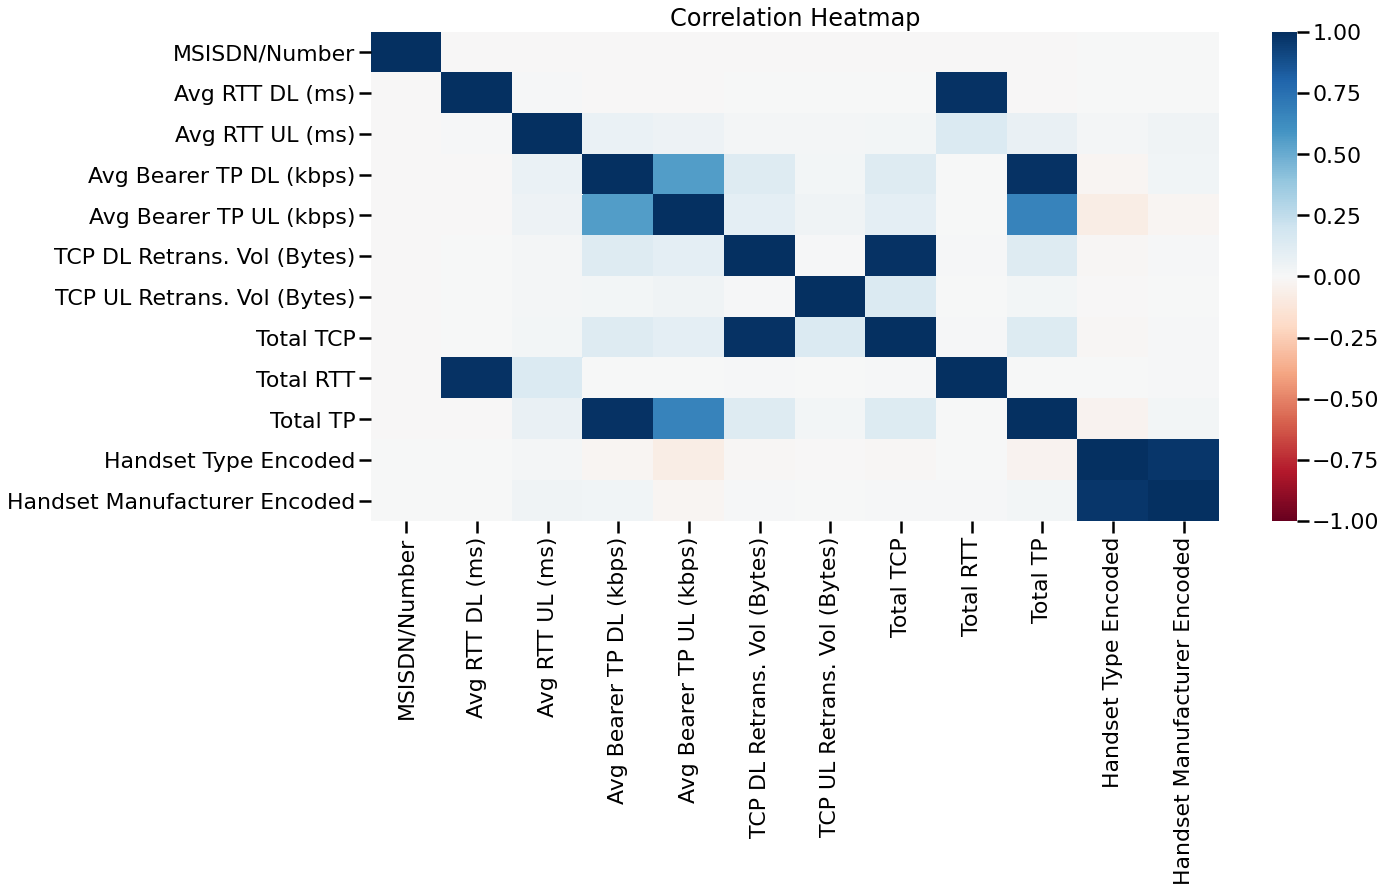

In [121]:
plt.figure(figsize = (19, 9))
cor = sns.heatmap(df_segmentation.corr(),
#                annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1
               )
# cor.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
# cor.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
# sns.set_context('talk')
plt.show()

In [122]:
# We run K-means with a fixed number of clusters. In our case 3.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [123]:
# We divide our data into the three clusters.
kmeans.fit(segmentation_std)

KMeans(n_clusters=3, random_state=42)

In [124]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [125]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Total TCP,Total RTT,Total TP,Handset Type Encoded,Handset Manufacturer Encoded
Segment K-means,,,,,,,,,,,,
0,3.367856e+10,80.920095,30.487192,55550.688408,7992.864505,1.852552e+07,6.952115e+05,1.922073e+07,111.407287,63543.552913,365.308457,47.157937
1,4.356443e+10,97.485448,12.057041,4258.023715,440.167224,1.293747e+06,5.768953e+04,1.351436e+06,109.542490,4698.190938,413.784045,45.983405
2,3.368634e+10,111.652000,38.628000,63010.660000,8402.020000,2.571442e+09,6.137505e+07,2.632817e+09,150.280000,71412.680000,322.808000,51.908000


In [126]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','MSISDN/Number']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [127]:
df_segm_analysis

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Total TCP,Total RTT,Total TP,Handset Type Encoded,Handset Manufacturer Encoded,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,
0,3.367856e+10,80.920095,30.487192,55550.688408,7992.864505,1.852552e+07,6.952115e+05,1.922073e+07,111.407287,63543.552913,365.308457,47.157937,26156,0.174372
1,4.356443e+10,97.485448,12.057041,4258.023715,440.167224,1.293747e+06,5.768953e+04,1.351436e+06,109.542490,4698.190938,413.784045,45.983405,123595,0.823961
2,3.368634e+10,111.652000,38.628000,63010.660000,8402.020000,2.571442e+09,6.137505e+07,2.632817e+09,150.280000,71412.680000,322.808000,51.908000,250,0.001667


In [128]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Better Network', 
                                                                  1:'Good Network',
                                                                  2:'Best Network'})

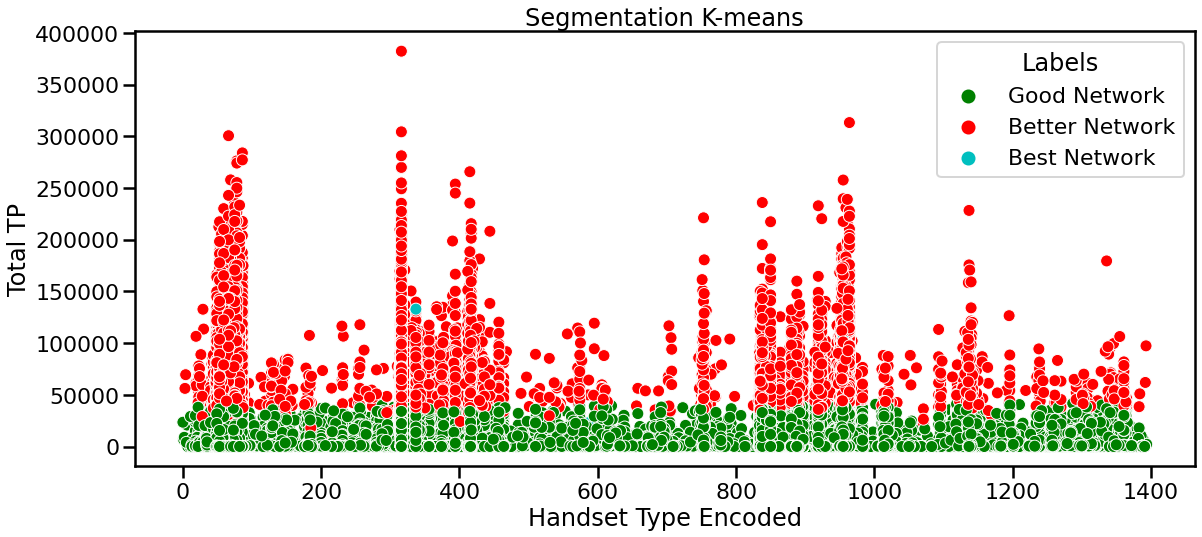

In [129]:
x_axis = df_segm_kmeans['Handset Type Encoded']
y_axis = df_segm_kmeans['Total TP']
plt.figure(figsize = (19, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

### Task 4

#### Task 4.1

#### Assigning Engagement Score to Each User

In [160]:
# checking engagement metric clusters
engagement_metrics

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters,Engagement Score
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,386.570872,1,0.49
3.360100e+10,1,181230.0,281.710071,1,0.49
3.360100e+10,1,134969.0,501.693672,1,0.49
3.360101e+10,1,49878.0,35.279702,1,0.50
3.360101e+10,2,253983.0,492.372777,1,0.49
...,...,...,...,...,...
3.378998e+10,1,178525.0,307.067756,1,0.49
3.379000e+10,1,140988.0,211.115113,1,0.49
3.197021e+12,1,877385.0,470.526473,1,0.45


Re-assigning cluster values for calculating ecludian distance (for scores) because based on statistics from previous analysis:
cluster 1 has highest average engagement based on duration of sessions
then cluster 0
then cluster 2

Therefore the values will be re-mapped accordingly

In [161]:
engagement_metrics['Clusters'] = engagement_metrics['Clusters'].map({1:2, 0:1, 2:0})
engagement_metrics

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters,Engagement Score
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,386.570872,2,0.49
3.360100e+10,1,181230.0,281.710071,2,0.49
3.360100e+10,1,134969.0,501.693672,2,0.49
3.360101e+10,1,49878.0,35.279702,2,0.50
3.360101e+10,2,253983.0,492.372777,2,0.49
...,...,...,...,...,...
3.378998e+10,1,178525.0,307.067756,2,0.49
3.379000e+10,1,140988.0,211.115113,2,0.49
3.197021e+12,1,877385.0,470.526473,2,0.45


In [130]:
# importing minmaxscaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [162]:
# We will use the first clustering dataframe for the engagement score
# first we scale the data 
scaled_data = minmax_scaler.fit_transform(engagement_metrics[['Dur. (ms)', 'Clusters']])

In [163]:
# importing module to calculate euclidean distance
from scipy.spatial import distance

# calculating euclidean distance and storing values in a list
holder = [round(distance.euclidean(i[0],i[1]), 2) for i in scaled_data]

# Creating Engagement score column
engagement_metrics['Engagement Score'] = holder
engagement_metrics.head()

,Bearer Id,Dur. (ms),Total Data (MegaByte),Clusters,Engagement Score
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,386.570872,2,0.99
3.360100e+10,1,181230.0,281.710071,2,0.99
3.360100e+10,1,134969.0,501.693672,2,0.99
3.360101e+10,1,49878.0,35.279702,2,1.00
3.360101e+10,2,253983.0,492.372777,2,0.99


#### Assigning Experience Score to Each User

In [137]:
df_segm_kmeans

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Total TCP,Total RTT,Total TP,Handset Type Encoded,Handset Manufacturer Encoded,Segment K-means,Labels
0,3.366496e+10,42.0,5.0,23.0,44.0,1330.0,1330.0,2660.0,47.0,67.0,838,103,1,Good Network
1,3.368185e+10,65.0,5.0,16.0,26.0,1330.0,1330.0,2660.0,70.0,42.0,888,103,1,Good Network
2,3.376063e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,2660.0,33.0,15.0,850,103,1,Good Network
3,3.375034e+10,28.0,5.0,44.0,44.0,1330.0,1330.0,2660.0,33.0,88.0,316,5,1,Good Network
4,3.369980e+10,28.0,5.0,6.0,9.0,1330.0,1330.0,2660.0,33.0,15.0,1014,103,1,Good Network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,32.0,0.0,52.0,65.0,1330.0,1330.0,2660.0,32.0,117.0,69,5,1,Good Network
149997,3.366345e+10,27.0,2.0,23.0,54.0,1330.0,1330.0,2660.0,29.0,77.0,73,5,1,Good Network
149998,3.362189e+10,43.0,6.0,43.0,47.0,1330.0,1330.0,2660.0,49.0,90.0,82,5,1,Good Network
149999,3.361962e+10,37.0,5.0,34.0,37.0,1330.0,1330.0,2660.0,42.0,71.0,356,52,1,Good Network


In [141]:
tp_df = df_segm_kmeans.groupby('MSISDN/Number')[['Total TP']].sum().sort_values(by='Total TP', ascending=False)
tp_df

,Total TP
MSISDN/Number,
3.362632e+10,18184571.0
3.376233e+10,902222.0
3.366871e+10,840424.0
3.365955e+10,798342.0
3.366995e+10,690815.0
...,...
3.377746e+10,0.0
3.377776e+10,0.0
3.366062e+10,0.0


In [156]:
skm_df = df_segm_kmeans.groupby('MSISDN/Number')[['Segment K-means', 'Labels']].min().sort_values(by='Segment K-means', ascending=False)
skm_df

,Segment K-means,Labels
MSISDN/Number,,
3.366404e+10,2,Best Network
3.369875e+10,2,Best Network
3.366846e+10,2,Best Network
3.366846e+10,2,Best Network
3.369849e+10,2,Best Network
...,...,...
3.363069e+10,0,Better Network
3.366594e+10,0,Better Network
3.363069e+10,0,Better Network


In [157]:
experience_metrics = pd.DataFrame()
experience_metrics = pd.concat([tp_df,skm_df], axis=1)
experience_metrics

,Total TP,Segment K-means,Labels
MSISDN/Number,,,
3.360100e+10,76.0,1,Good Network
3.360100e+10,99.0,1,Good Network
3.360100e+10,97.0,1,Good Network
3.360101e+10,248.0,1,Good Network
3.360101e+10,56844.0,0,Better Network
...,...,...,...
3.379000e+10,10365.0,1,Good Network
3.379000e+10,116.0,1,Good Network
3.197021e+12,1.0,1,Good Network


Re-assigning cluster values for calculating ecludian distance (for scores) because based on statistics from previous analysis: cluster 2 has best average experience based on throughput then cluster 0 then cluster 1

Therefore the values will be re-mapped accordingly.

In [166]:
experience_metrics['Segment K-means'] = experience_metrics['Segment K-means'].map({2:2, 0:1,1:0})
experience_metrics

,Total TP,Segment K-means,Labels
MSISDN/Number,,,
3.360100e+10,76.0,0,Good Network
3.360100e+10,99.0,0,Good Network
3.360100e+10,97.0,0,Good Network
3.360101e+10,248.0,0,Good Network
3.360101e+10,56844.0,1,Better Network
...,...,...,...
3.379000e+10,10365.0,0,Good Network
3.379000e+10,116.0,0,Good Network
3.197021e+12,1.0,0,Good Network


In [167]:
# first we scale the data 
scaled_data2 = minmax_scaler.fit_transform(experience_metrics[['Total TP', 'Segment K-means']])

In [170]:
# calculating euclidean distance and storing values in a list
holder2 = [round(distance.euclidean(i[0],i[1]), 2) for i in scaled_data2]

# Creating Engagement score column
experience_metrics['Experience Score'] = holder2
experience_metrics.head()

,Total TP,Segment K-means,Labels,Experience Score
MSISDN/Number,,,,
3.360100e+10,76.0,0,Good Network,0.0
3.360100e+10,99.0,0,Good Network,0.0
3.360100e+10,97.0,0,Good Network,0.0
3.360101e+10,248.0,0,Good Network,0.0
3.360101e+10,56844.0,1,Better Network,0.5
